<a href="https://colab.research.google.com/github/debernall/Proyecto/blob/main/Proyecto_bootcamp_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introducción

# Proyecto Lluvia

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
import os

In [2]:
import plotly.express as pex
from plotly.subplots import make_subplots
import plotly.graph_objects as go

*Sistema de archivos*

    ./
    
    ./Proyecto/
        ./Proyecto/Proyecto_bootcamp_cuaderno.ipynb

    ./Datasets/
        ./Datasets/...... .csv
    
    ./CleanDatasets/
        ./CleanDatasets/.....  .parquet


# Limpieza de archivos precipitaciones - conversión a parquet

### Primera exploración

Se importa el primer documento previo a la limpieza. Se inicia con el archivo de menor tamaño. Todos los datos corresponden a precipitación y tienen la misma unidad de medida.

In [3]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 #nrows=10
                 )
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,42077020,240,11/01/2023 07:30:00 PM,0.2,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
1,42077020,240,11/01/2023 11:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
2,42077020,240,11/01/2023 03:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
3,42077020,240,11/01/2023 09:30:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
4,42077020,240,11/01/2023 05:40:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
...,...,...,...,...,...,...,...,...,...,...,...,...
9147,42077020,240,06/22/2024 02:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9148,42077020,240,06/22/2024 01:30:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9149,42077020,240,06/22/2024 01:40:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm
9150,42077020,240,06/22/2024 01:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24,PRECIPITACIÓN,mm


En la siguiente celda se imprime un pequeño resumen. Es importante resaltar que no hay datos nulos y la necesidad de cambiar el formato de cada columna por uno mas adecuado que reduzca el tamaño del dataframe.

In [4]:
size_0=df.memory_usage(deep=True).sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CodigoEstacion     9152 non-null   int64  
 1   CodigoSensor       9152 non-null   int64  
 2   FechaObservacion   9152 non-null   object 
 3   ValorObservado     9152 non-null   float64
 4   NombreEstacion     9152 non-null   object 
 5   Departamento       9152 non-null   object 
 6   Municipio          9152 non-null   object 
 7   ZonaHidrografica   9152 non-null   object 
 8   Latitud            9152 non-null   float64
 9   Longitud           9152 non-null   float64
 10  DescripcionSensor  9152 non-null   object 
 11  UnidadMedida       9152 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 858.1+ KB


### Vaupes

Se importa nuevamente el archivo csv, seleccionando las columnas relevantes y eligiendo un formato adeacuado para cada columna.

In [5]:
df = pd.read_csv('../Datasets/Precipitaci_n_20241016(vaupes).csv',
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0042077020,0240,11/01/2023 07:30:00 PM,0.2,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
1,0042077020,0240,11/01/2023 11:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
2,0042077020,0240,11/01/2023 03:10:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
3,0042077020,0240,11/01/2023 09:30:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
4,0042077020,0240,11/01/2023 05:40:00 PM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
...,...,...,...,...,...,...,...,...,...,...
9147,0042077020,0240,06/22/2024 02:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9148,0042077020,0240,06/22/2024 01:30:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9149,0042077020,0240,06/22/2024 01:40:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24
9150,0042077020,0240,06/22/2024 01:20:00 AM,0.0,MITU,VAUPES,MITÚ,VAUPES,1.26,-70.24


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CodigoEstacion    9152 non-null   category
 1   CodigoSensor      9152 non-null   category
 2   FechaObservacion  9152 non-null   object  
 3   ValorObservado    9152 non-null   float32 
 4   NombreEstacion    9152 non-null   category
 5   Departamento      9152 non-null   category
 6   Municipio         9152 non-null   category
 7   ZonaHidrografica  9152 non-null   category
 8   Latitud           9152 non-null   category
 9   Longitud          9152 non-null   category
dtypes: category(8), float32(1), object(1)
memory usage: 178.9+ KB


Se muestra una comparación entre el tamaño del dataframe tras el cambio de formato a las columnas

In [7]:
size_f=df.memory_usage(deep=True).sum()
print(size_f/size_0)

0.1759772734217371


**Formato de fecha**

In [8]:
df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9152 entries, 0 to 9151
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    9152 non-null   category      
 1   CodigoSensor      9152 non-null   category      
 2   FechaObservacion  9152 non-null   datetime64[ns]
 3   ValorObservado    9152 non-null   float32       
 4   NombreEstacion    9152 non-null   category      
 5   Departamento      9152 non-null   category      
 6   Municipio         9152 non-null   category      
 7   ZonaHidrografica  9152 non-null   category      
 8   Latitud           9152 non-null   category      
 9   Longitud          9152 non-null   category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 178.9 KB


In [10]:
df.to_parquet('../CleanDatasets/rain_vaupes.parquet')

In [11]:
namesFiles = os.listdir('../Datasets')
namesFiles = [re.findall(r'\((\w*)\)',x)[0] for x in namesFiles]
print(namesFiles)

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']


### Caquetá

Tener en cuenta que la información sobre caquetá está almacenada en dos archivos

#### Caquetá 2

In [12]:
nameFile = '../Datasets/Precipitaci_n_20241016('+ namesFiles[13] +').csv'
nameFile

'../Datasets/Precipitaci_n_20241016(caqueta2).csv'

In [13]:
df_caqueta2 = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
df_caqueta2['FechaObservacion'] = pd.to_datetime(df_caqueta2['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_caqueta2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0044055010,0240,2023-09-13 01:50:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
1,0044035501,0240,2023-09-18 06:30:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
2,0044035501,0240,2023-09-19 07:50:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
3,0044035501,0240,2023-09-19 07:30:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
4,0044035501,0240,2023-09-18 09:20:00,0.0,PAUJIL,CAQUETÁ,EL PAUJIL,CAQUETÁ,1.57381944,-75.3402
...,...,...,...,...,...,...,...,...,...,...
14541,0044055010,0240,2024-06-12 02:30:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14542,0044055010,0240,2024-06-12 06:30:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14543,0044055010,0240,2024-06-12 12:50:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111
14544,0044055010,0240,2024-06-12 02:10:00,0.0,TRES ESQUINAS,CAQUETÁ,SOLANO,CAQUETÁ,0.7375,-75.23611111


La siguiente celda imprimirá la cantidad de valores de nulos

In [14]:
nulls = df_caqueta2.count(axis=1).sum()
size = df_caqueta2.shape[0]*df_caqueta2.shape[1]
print(size-nulls)

0


De nuevo se observa que el archivo tiene un tamaño menor y que los diferentes formatos son aplicados correctamente a cada columna

In [15]:
df_caqueta2.info()
#df_caqueta2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14546 entries, 0 to 14545
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   CodigoEstacion    14546 non-null  category      
 1   CodigoSensor      14546 non-null  category      
 2   FechaObservacion  14546 non-null  datetime64[ns]
 3   ValorObservado    14546 non-null  float32       
 4   NombreEstacion    14546 non-null  category      
 5   Departamento      14546 non-null  category      
 6   Municipio         14546 non-null  category      
 7   ZonaHidrografica  14546 non-null  category      
 8   Latitud           14546 non-null  category      
 9   Longitud          14546 non-null  category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 285.1 KB


### Todos los departamentos

In [16]:
print(namesFiles)
print(len(namesFiles))

['amazonas', 'antioquia', 'arauca', 'atlantico1', 'atlantico2', 'bogota1', 'bogota2', 'bogota3', 'bolivar1', 'bolivar2', 'boyaca', 'caldas', 'caqueta1', 'caqueta2', 'casanare', 'cauca', 'cesar', 'choco', 'choco1', 'cordoba1', 'cordoba2', 'cundinamarca', 'guainia', 'guajira', 'guaviare', 'huila', 'magdalena', 'meta', 'narino', 'narino1', 'nill', 'norte_de_santander', 'putumayo', 'quindio', 'risaralda', 'sanandres1', 'sanandres2', 'sanandres3', 'sanandres4', 'santander', 'sucre', 'tolima', 'valle_del_cauca', 'vaupes', 'vaupes1', 'vichada']
46


In [24]:
for name in namesFiles[:]:
    nameFile = '../Datasets/Precipitaci_n_20241016('+ name +').csv'
    df_dept = pd.read_csv(nameFile,
                 sep=',',
                 usecols= [0,1,2,3,4,5,6,7,8,9],
                 dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category'}
                 )
    df_dept['FechaObservacion'] = pd.to_datetime(df_dept['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
    nulls = df_dept.count(axis=1).sum()
    size = df_dept.shape[0]*df_dept.shape[1]
    if nulls-size != 0:
        print(f'{nulls-size} nulls in {name}, parquet file can not created')
    else:
        df_dept.to_parquet(f'../CleanDatasets/rain_{name}.parquet')
        print(f'Not nulls in {name}, parquet file created')


Not nulls in amazonas, parquet file created
Not nulls in antioquia, parquet file created
Not nulls in arauca, parquet file created
Not nulls in atlantico1, parquet file created
Not nulls in atlantico2, parquet file created
Not nulls in bogota1, parquet file created
Not nulls in bogota2, parquet file created
Not nulls in bogota3, parquet file created
Not nulls in bolivar1, parquet file created
Not nulls in bolivar2, parquet file created
Not nulls in boyaca, parquet file created
Not nulls in caldas, parquet file created
Not nulls in caqueta1, parquet file created
Not nulls in caqueta2, parquet file created
Not nulls in casanare, parquet file created
Not nulls in cauca, parquet file created
Not nulls in cesar, parquet file created
Not nulls in choco, parquet file created
Not nulls in choco1, parquet file created
Not nulls in cordoba1, parquet file created
Not nulls in cordoba2, parquet file created
Not nulls in cundinamarca, parquet file created
Not nulls in guainia, parquet file created


# Consolidación de archivos

Se requiere un conjunto de datos que contiene la información de las estaciones de monitoreo.

A continuación se listan los archivos de la segunda carpeta que contiene los datasets:

    - Catálogo nacional de estaciones (Contine el listado de las estaciones)
    - Datos de estaciones IDEAM y terceros (Contiene mediciones de diversas estaciones propias y externas al IDEAM)
    - Datos hidrometeorológicos (Mediciones de temperatura)
    - Presión atmosférica  

In [25]:
namesFiles2 = os.listdir('../Datasets2')
namesFiles2 = [x for x in namesFiles2]
print(namesFiles2)

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv', 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv', 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv', 'Presi_n_Atmosf_rica_20241017.csv']


### Limpieza *DATOS ESTACIONES IDEAM*

La ruta de acceso al archivo de Datos estaciones IDEAM es f'../Datasets2/{namesFiles2[1]}'

In [26]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            nrows=3
)
df_estaciones

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida,Entidad
0,2120500204,69,10/15/2024 09:04:00 PM,15.8,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
1,2120500204,70,10/15/2024 09:59:00 PM,15.5,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA MÍNIMA DEL AIRE A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...
2,2120500204,69,10/15/2024 10:25:00 PM,15.7,IDEAM PUENTE ARANDA,BOGOTÁ,BOGOTÁ D.C,ALTO MAGDALENA,4.621556,-74.104709,TEMPERATURA DEL AIRE MÁXIMA A 2 m,°C,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...


In [27]:
df_estaciones = pd.read_csv(f'../Datasets2/{namesFiles2[1]}',
                            sep=',',
                            dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category',12:'category'}
                            #nrows=3
)
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype   
---  ------             --------------   -----   
 0   CodigoEstacion     202642 non-null  category
 1   CodigoSensor       202642 non-null  category
 2   FechaObservacion   202642 non-null  object  
 3   ValorObservado     202642 non-null  float32 
 4   NombreEstacion     202642 non-null  category
 5   Departamento       202642 non-null  category
 6   Municipio          202642 non-null  category
 7   ZonaHidrografica   202642 non-null  category
 8   Latitud            202642 non-null  category
 9   Longitud           202642 non-null  category
 10  DescripcionSensor  202642 non-null  category
 11  UnidadMedida       202642 non-null  category
 12  Entidad            202642 non-null  category
dtypes: category(11), float32(1), object(1)
memory usage: 5.3+ MB


Se evidencia que no hay valores nulos. Hacemos una conversión a formato de fecha y almacenamos el archivo en formato .parquet

In [28]:
df_estaciones['FechaObservacion'] = pd.to_datetime(df_estaciones['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202642 entries, 0 to 202641
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CodigoEstacion     202642 non-null  category      
 1   CodigoSensor       202642 non-null  category      
 2   FechaObservacion   202642 non-null  datetime64[ns]
 3   ValorObservado     202642 non-null  float32       
 4   NombreEstacion     202642 non-null  category      
 5   Departamento       202642 non-null  category      
 6   Municipio          202642 non-null  category      
 7   ZonaHidrografica   202642 non-null  category      
 8   Latitud            202642 non-null  category      
 9   Longitud           202642 non-null  category      
 10  DescripcionSensor  202642 non-null  category      
 11  UnidadMedida       202642 non-null  category      
 12  Entidad            202642 non-null  category      
dtypes: category(11), datetime64[ns](1), float32(

In [29]:
df_estaciones.to_parquet('../CleanDatasets2/estaciones.parquet')

### Limpieza *DATOS PRESIÓN ATMOSFÉRICA*

In [30]:
namesFiles2

['Cat_logo_Nacional_de_Estaciones_del_IDEAM_20241017.csv',
 'Datos_de_Estaciones_de_IDEAM_y_de_Terceros_20241017.csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv',
 'Presi_n_Atmosf_rica_20241017.csv']

La ruta de acceso a los datos de presión atmosférica es: f '../Datasets2/{namesFiles2[-1]}']

In [31]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        nrows=3
)
df_presion

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,36015020,255,10/03/2017 06:00:00 AM,992.5,EL DIAMANTE - AUT,CASANARE,PAZ DE ARIPORO,META,5.816194,-71.419833,Presión Atmosferica (1h),HPa
1,21195190,255,02/14/2014 05:00:00 AM,785.2,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111,-74.311750,Presión Atmosferica (1h),HPa
2,21015050,255,09/27/2013 06:00:00 PM,805.3,PURACE - AUT,HUILA,SAN AGUSTÍN,ALTO MAGDALENA,1.925917,-76.427556,Presión Atmosferica (1h),HPa


In [32]:
df_presion = pd.read_csv(
                        f'../Datasets2/{namesFiles2[-1]}',
                        sep=',',
                        dtype={0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}
)
df_presion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22611008 entries, 0 to 22611007
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 582.3+ MB


In [33]:
df_presion['FechaObservacion'] = pd.to_datetime(df_presion['FechaObservacion'],format='%m/%d/%Y %H:%M:%S %p')
df_presion

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,0036015020,0255,2017-10-03 06:00:00,992.500000,EL DIAMANTE - AUT,CASANARE,PAZ DE ARIPORO,META,5.816194444,-71.41983333,Presión Atmosferica (1h),HPa
1,0021195190,0255,2014-02-14 05:00:00,785.200012,PASCA - AUT,CUNDINAMARCA,PASCA,ALTO MAGDALENA,4.310111111,-74.31175,Presión Atmosferica (1h),HPa
2,0021015050,0255,2013-09-27 06:00:00,805.299988,PURACE - AUT,HUILA,SAN AGUSTÍN,ALTO MAGDALENA,1.925916667,-76.42755556,Presión Atmosferica (1h),HPa
3,0021115010,0255,2005-11-28 10:00:00,958.500000,DESIERTO TATACOA,HUILA,VILLAVIEJA,ALTO MAGDALENA,3.234,-75.168,Presión Atmosferica (1h),HPa
4,0028035060,0255,2008-04-08 04:00:00,988.700012,FEDEARROZ - AUT,CESAR,VALLEDUPAR,CESAR,10.46361111,-73.24805556,Presión Atmosferica (1h),HPa
...,...,...,...,...,...,...,...,...,...,...,...,...
22611003,0048015050,0258,2024-10-16 11:04:00,1000.500000,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861111,-69.94091667,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611004,0048015050,0258,2024-10-16 09:08:00,1004.099976,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861111,-69.94091667,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611005,0016015501,0258,2024-10-16 07:02:00,972.900024,AEROPUERTO CAMILO DAZA,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.93028,-72.50917,GPRS - PRESIÓN ATMOSFÉRICA,hPA
22611006,0048015040,0255,2024-10-16 10:40:00,997.400024,PUERTO NARIÑO,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS,-3.780305556,-70.36263889,PRESIÓN ATMOSFÉRICA,hPa


In [34]:
df_presion.count()

CodigoEstacion       22611008
CodigoSensor         22611008
FechaObservacion     22611008
ValorObservado       22611008
NombreEstacion       22611008
Departamento         22611008
Municipio            22611008
ZonaHidrografica     22611008
Latitud              22611008
Longitud             22611008
DescripcionSensor    22611008
UnidadMedida         22611008
dtype: int64

Se observa con la función .count() que el tamaño de valores no nulos es igual al índice del rango del dataframe encontrado en la celda anterior.

In [35]:
df_presion.to_parquet('../CleanDatasets2/presion.parquet')

### Limpieza *DATOS TEMPERATURA*

Los datos de temperatura se distribuyen en 5 archivos csv distintos, todos con las mismas columnas. La ruta de acceso a los archivos es 

- '../Datasets2/Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(*)' Donde * es un valor entre 0 y 4

In [36]:
namesFiles2[2:-1]

['Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(0).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(1).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(2).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(3).csv',
 'Datos_Hidrometeorol_gicos_Crudos_-_Red_de_Estaciones_IDEAM___Temperatura_20241017(4).csv']

In [37]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        nrows=3
)
df_temp

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,48015050,71,01/04/2024 09:58:00 PM,21.1,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.193861,-69.940917,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
1,15065180,71,01/04/2024 07:46:00 PM,22.3,AEROPUERTO ALM. PADILLA -,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.528444,-72.917722,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
2,3502500135,71,01/04/2024 03:56:00 AM,17.0,GUAYABETAL POLLO OLIMPICO,CUNDINAMARCA,GUAYABETAL,META,4.225530,-73.814810,GPRS - TEMPERATURA DEL AIRE A 2 m,°C


In [38]:
df_temp = pd.read_csv(
                        f'../Datasets2/{namesFiles2[2]}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
df_temp

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud,DescripcionSensor,UnidadMedida
0,0048015050,0071,01/04/2024 09:58:00 PM,21.100000,AEROPUERTO VASQUEZ COBO,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS,-4.19386111,-69.94091667,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
1,0015065180,0071,01/04/2024 07:46:00 PM,22.299999,AEROPUERTO ALM. PADILLA -,LA GUAJIRA,RIOHACHA,CARIBE - GUAJIRA,11.5284444,-72.91772222,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
2,3502500135,0071,01/04/2024 03:56:00 AM,17.000000,GUAYABETAL POLLO OLIMPICO,CUNDINAMARCA,GUAYABETAL,META,4.22553,-73.81481,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
3,0016015501,0071,01/04/2024 04:30:00 PM,28.500000,AEROPUERTO CAMILO DAZA,NORTE DE SANTANDER,CÚCUTA,CATATUMBO,7.93028,-72.50917,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4,0026125710,0071,01/04/2024 06:58:00 AM,20.900000,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.73951944,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
...,...,...,...,...,...,...,...,...,...,...,...,...
4101303,0015015050,0071,10/16/2024 10:08:00 AM,29.700001,AEROPUERTO SIMON BOLIVAR,MAGDALENA,SANTA MARTA,CARIBE - GUAJIRA,11.1146944,-74.231027778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101304,0026125710,0071,10/16/2024 05:32:00 AM,18.500000,AEROPUERTO MATECANA,RISARALDA,PEREIRA,CAUCA,4.812675,-75.739519444,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101305,0015015050,0071,10/16/2024 07:20:00 PM,28.000000,AEROPUERTO SIMON BOLIVAR,MAGDALENA,SANTA MARTA,CARIBE - GUAJIRA,11.1146944,-74.231027778,GPRS - TEMPERATURA DEL AIRE A 2 m,°C
4101306,0017015010,0071,10/16/2024 01:04:00 PM,26.900000,AEROPUERTO SESQUICENTENARIO,ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA...,SAN ANDRÉS,ISLAS CARIBE,12.587849,-81.701117,GPRS - TEMPERATURA DEL AIRE A 2 m,°C


In [39]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype   
---  ------             -----   
 0   CodigoEstacion     category
 1   CodigoSensor       category
 2   FechaObservacion   object  
 3   ValorObservado     float32 
 4   NombreEstacion     category
 5   Departamento       category
 6   Municipio          category
 7   ZonaHidrografica   category
 8   Latitud            category
 9   Longitud           category
 10  DescripcionSensor  category
 11  UnidadMedida       category
dtypes: category(10), float32(1), object(1)
memory usage: 86.1+ MB


In [40]:
df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4101308 entries, 0 to 4101307
Data columns (total 12 columns):
 #   Column             Dtype         
---  ------             -----         
 0   CodigoEstacion     category      
 1   CodigoSensor       category      
 2   FechaObservacion   datetime64[ns]
 3   ValorObservado     float32       
 4   NombreEstacion     category      
 5   Departamento       category      
 6   Municipio          category      
 7   ZonaHidrografica   category      
 8   Latitud            category      
 9   Longitud           category      
 10  DescripcionSensor  category      
 11  UnidadMedida       category      
dtypes: category(10), datetime64[ns](1), float32(1)
memory usage: 86.1 MB


In [41]:
df_temp.to_parquet('../CleanDatasets2/Temp_0.parquet')

In [42]:
index_temp = 1
for i in namesFiles2[3:-1]:
    df_temp = pd.read_csv(
                        f'../Datasets2/{i}',
                        sep=',',
                        dtype= {0:'category',1:'category',2:'str',3:'float32',4:'category',5:'category',6:'category',7:'category',8:'category',9:'category',10:'category',11:'category'}         
                    )
    df_temp['FechaObservacion'] = pd.to_datetime(df_temp['FechaObservacion'], format='%m/%d/%Y %H:%M:%S %p')
    df_temp.to_parquet(f'../CleanDatasets2/Temp_{str(index_temp)}.parquet')
    index_temp += 1

# Análisis exploratorio de datos

In [43]:
df_2 = pd.read_parquet(f'../CleanDatasets/rain_boyaca.parquet')
df_2

,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,0023125160,0240,2009-10-07 02:10:00,0.1,SAN PABLO DE BORBUR - AUT,BOYACÁ,SAN PABLO DE BORBUR,MEDIO MAGDALENA,5.647027778,-74.07130556
1,0024035410,0240,2012-12-17 03:10:00,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333333,-72.91115278
2,0023125501,0240,2019-03-21 07:10:00,0.0,PAUNA - AUT,BOYACÁ,PAUNA,MEDIO MAGDALENA,5.657130556,-73.96032778
3,0035085070,0240,2018-07-28 02:30:00,0.0,SANTA MARIA - AUT,BOYACÁ,SANTA MARÍA,META,4.84125,-73.25669444
4,0024035410,0240,2018-01-20 05:37:00,0.0,SOGAMOSO - AUT,BOYACÁ,SOGAMOSO,SOGAMOSO,5.753333333,-72.91115278
...,...,...,...,...,...,...,...,...,...,...
13730165,0024035340,0257,2024-10-15 12:52:00,0.0,AEROPUERTO A LLERAS C,BOYACÁ,SOGAMOSO,SOGAMOSO,5.676944444,-72.96791667
13730166,2403000117,0257,2024-10-15 09:44:00,0.0,PM LA LAGUNA,BOYACÁ,GUACAMAYAS,SOGAMOSO,6.447166667,-72.497694444
13730167,0035217090,0240,2024-10-15 02:40:00,0.0,LABRANZA GRANDE,BOYACÁ,LABRANZAGRANDE,META,5.566916667,-72.58355556
13730168,2403700149,0240,2024-10-15 03:40:00,0.0,PUENTE LA RAMADA,BOYACÁ,CHISCAS,SOGAMOSO,6.5607,-72.5012


In [44]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730170 entries, 0 to 13730169
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    category      
 1   CodigoSensor      category      
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    category      
 5   Departamento      category      
 6   Municipio         category      
 7   ZonaHidrografica  category      
 8   Latitud           category      
 9   Longitud          category      
dtypes: category(8), datetime64[ns](1), float32(1)
memory usage: 261.9 MB


In [45]:
df_2['Year'] = df_2['FechaObservacion'].dt.year
df_2['Month'] = df_2['FechaObservacion'].dt.month
year_total = (
    df_2
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total

,Year,ValorObservado
0,2005,2339.300049
1,2006,2464.699951
2,2007,7516.899902
3,2008,4902.600098
4,2009,3027.100098
5,2010,6817.899902
6,2011,6794.899902
7,2012,4585.799805
8,2013,4849.600098
9,2014,3081.699951


In [46]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])

fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)
###### Si sale error, toca instalar nbformat

Los archivos en formato parquet pueden ser consultados en la carpeta compartida de google drive: https://drive.google.com/drive/folders/1h9_VFIFKbZ8tiavxZM9Nm9koIxJxtCWf?usp=sharing

Se puede acceder a la carpeta compartida desde local instalando la versión de escritorio y buscando la ruta de los archivos.

In [7]:
#namesFiles = os.listdir(r'G:\Mi unidad\Bootcamp\Proyecto_Bootcamp\Data\CleanDatasets')
namesFiles = os.listdir(r'..\CleanDatasets')
print('Primeros 23')
print(namesFiles[0:23])
print('Últimos 23')
print(namesFiles[23:-1])

Primeros 23
['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet']
Últimos 23
['rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_sa

CleanDatasets contiene los archivos parquet sobre precipitaciones

CleanDatasets2 contiene los archivos parquet sobre temperatura, presión, catálogo de estaciones.

Configuramos rutas para trabajar en local.

In [8]:
path = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto'                    

In [5]:
path = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\CleanDatasets' 

In [4]:
path = r'C:\Users\Josue Florez\Documents\Maria Angelica\Proyectos\Proyecto_bootcamp\Data'

## LIMPIEZA, CARGA Y UNIFICACIÓN DE ARCHIVOS

Lista de archivos:

In [8]:
namesFiles = os.listdir(path)
print(namesFiles)

['rain_amazonas.parquet', 'rain_antioquia.parquet', 'rain_arauca.parquet', 'rain_atlantico1.parquet', 'rain_atlantico2.parquet', 'rain_bogota1.parquet', 'rain_bogota2.parquet', 'rain_bogota3.parquet', 'rain_bolivar1.parquet', 'rain_bolivar2.parquet', 'rain_boyaca.parquet', 'rain_caldas.parquet', 'rain_caqueta1.parquet', 'rain_caqueta2.parquet', 'rain_casanare.parquet', 'rain_cauca.parquet', 'rain_cesar.parquet', 'rain_choco.parquet', 'rain_choco1.parquet', 'rain_cordoba1.parquet', 'rain_cordoba2.parquet', 'rain_cundinamarca.parquet', 'rain_guainia.parquet', 'rain_guajira.parquet', 'rain_guaviare.parquet', 'rain_huila.parquet', 'rain_magdalena.parquet', 'rain_meta.parquet', 'rain_narino.parquet', 'rain_narino1.parquet', 'rain_nill.parquet', 'rain_norte_de_santander.parquet', 'rain_putumayo.parquet', 'rain_quindio.parquet', 'rain_risaralda.parquet', 'rain_sanandres1.parquet', 'rain_sanandres2.parquet', 'rain_sanandres3.parquet', 'rain_sanandres4.parquet', 'rain_santander.parquet', 'rain_

### Dimensionalidad de los dataset

Estamos interesados en encontrar los valores nulos dentro de los diferentes archivos, en la siguiente celda se calcula un DataFrame que detalla la siguiente información:

- File: Nombre del archivo
- Rows: Cantidad de filas del archivo
- Columns: Cantidad de columnas del archivo
- Size: Tamaño del dataframe, cantidad de celdas
- Nulls: Cantidad de valores nulos

Se observa que ningún archivo contiene valores nulos, además todos tienen la misma cantidad de columnas por tanto es posible formar un solo dataframe

In [56]:
dim = pd.DataFrame(columns=['File','Rows','Columns','Size','Nulls'])

for i in namesFiles:
    path_file = path + "\\" + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    row = pd.DataFrame({'File':[i],
                        'Rows':[df_dept2.shape[0]],
                        'Columns':[df_dept2.shape[1]],
                        'Size':[df_dept2.size],
                        'Nulls':[df_dept2.size-df_dept2.count().sum()],
                        'CodigoEstacion': df_dept2['CodigoEstacion'].dtype,
                        'CodigoSensor': df_dept2['CodigoSensor'].dtype,
                        'FechaObservacion': df_dept2['FechaObservacion'].dtype,
                        'ValorObservado': df_dept2['ValorObservado'].dtype,
                        'NombreEstacion': df_dept2['NombreEstacion'].dtype,
                        'Departamento': df_dept2['Departamento'].dtype,
                        'Municipio': df_dept2['Municipio'].dtype,
                        'ZonaHidrografica': df_dept2['ZonaHidrografica'].dtype,
                        'Latitud': df_dept2['Latitud'].dtype,
                        'Longitud': df_dept2['Longitud'].dtype
                        }
                        )
    dim = pd.concat([dim,row], ignore_index=True)

dim

,File,Rows,Columns,Size,Nulls,CodigoEstacion,CodigoSensor,FechaObservacion,ValorObservado,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
0,rain_amazonas.parquet,706717,10,7067170,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
1,rain_antioquia.parquet,14178669,10,141786690,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
2,rain_arauca.parquet,794950,10,7949500,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
3,rain_atlantico1.parquet,1371211,10,13712110,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
4,rain_atlantico2.parquet,1156367,10,11563670,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
5,rain_bogota1.parquet,1779933,10,17799330,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
6,rain_bogota2.parquet,19408968,10,194089680,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
7,rain_bogota3.parquet,3180034,10,31800340,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
8,rain_bolivar1.parquet,1917368,10,19173680,0,category,category,datetime64[ns],float32,category,category,category,category,category,category
9,rain_bolivar2.parquet,1498134,10,14981340,0,category,category,datetime64[ns],float32,category,category,category,category,category,category


### Tipos de datos

Estamos interesados en recopilar la información de los diferentes archivos parquet para formar un solo dataframe sobre el cual se pudieran calcular algunas estadísticas exploratorias. Inicialmente, concatenamos los diferentes archivos en un solo dataframe, sin embargo esta operación tardó 80 minutos.

In [ ]:
df_part2 = pd.DataFrame()
for i in namesFiles:
    path_file = path + '\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    df_part2 = pd.concat([df_part2,df_dept2], ignore_index=True)
    del df_dept2

df_part2

In [58]:
df_part2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199781152 entries, 0 to 199781151
Data columns (total 10 columns):
 #   Column            Dtype         
---  ------            -----         
 0   CodigoEstacion    object        
 1   CodigoSensor      object        
 2   FechaObservacion  datetime64[ns]
 3   ValorObservado    float32       
 4   NombreEstacion    object        
 5   Departamento      object        
 6   Municipio         object        
 7   ZonaHidrografica  object        
 8   Latitud           object        
 9   Longitud          object        
dtypes: datetime64[ns](1), float32(1), object(8)
memory usage: 14.1+ GB


Teniendo en cuenta lo anterior y que el tamaño del dataframe en memoria era aprox 14.1GB decidimos construir primero un dataframe basado en las columnas que ofrecen información acerca de la ubicación. Se evidencia una reducción en el tiempo de procesamiento (57s), adicionalmente con el objetivo de conservar la cantidad de registros de cada ubicación, calculamos la columa 'TotalEntries'. Es importante resaltar que la agrupación de todos los archivos indica que existen *199781152* filas.

In [9]:
df_part = pd.DataFrame()
for i in namesFiles:
    path_file = path + '\\' + i
    df_dept_aux = pd.read_parquet(
                                path_file,
                                columns=['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud']
                            )
    df_dept = df_dept_aux.groupby(['CodigoEstacion','NombreEstacion','Departamento','Municipio','ZonaHidrografica','Latitud','Longitud'], observed=True).agg({'Longitud':'count'})
    df_dept.columns = ['TotalEntries']
    df_dept = df_dept.reset_index()
    df_dept = df_dept.rename({'CodigoEstacion':'CodSta',
                            'NombreEstacion':'NameSta',
                            'Departamento':'Dept',
                            'Municipio':'City',
                            'ZonaHidrografica':'Zone',
                            'Latitud':'Lat',
                            'Longitud':'Long'
                            }, 
                            axis=1)
    df_dept = df_dept.astype({'CodSta':'str',
                            'NameSta':'str',
                            'Dept':'str',
                            'City':'str',
                            'Zone':'str',
                            'Lat':'float64',
                            'Long':'float64',
                            'TotalEntries':'int64'
                            })
    df_part = pd.concat([df_part,df_dept], ignore_index=True)


df_part.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CodSta        1440 non-null   object 
 1   NameSta       1440 non-null   object 
 2   Dept          1440 non-null   object 
 3   City          1440 non-null   object 
 4   Zone          1440 non-null   object 
 5   Lat           1440 non-null   float64
 6   Long          1440 non-null   float64
 7   TotalEntries  1440 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 90.1+ KB


En la siguiente celda imprimimos la cantidad de valores diferentes por cada columna con el objetivo de identificar incoherencias en los datos y posibles valores duplicados.
Por ejemplo, es posible que un municipio como Bogotá se encuentre escrito de diferentes formas como: 'Bogota', 'Bogotá, D.C.' ...etc pero que corresponden al mismo municipio. Esto puede suceder con los nombres de las estaciones y con demás columnas con formato category

In [80]:
df_part.nunique()

CodSta           894
NameSta         1186
Dept              46
City             505
Zone              34
Lat             1191
Long            1098
TotalEntries    1307
dtype: int64

Note que existen 894 códigos de estación pero existen 1186 nombres de estación, 1191 latitudes y 1098 longitudes. Esto indica que para algunos nombres de estación y coordenadas están escritos de manera diferente para una misma estación. Vamos a hacer un pequeño análisis para identificar estas incongruencias y evitar pérdidas de información.

#### Limpieza de datos correspondiente al nombre y coordenadas de las estaciones

In [10]:
df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()

,CodSta,NameSta,Lat,Long,TotalEntries
0,0011017020,PR CHOCO: BAGADO,5.412000,-76.418000,60599
1,0011025501,CARMEN DE ATRATO - AUT,5.888719,-76.145167,499161
2,0011027030,EL SIETE,5.862000,-76.152056,1023
3,0011027030,EL SIETE - AUT,5.862000,-76.152056,179006
4,0011027070,BORAUDO,5.515000,-76.576000,409792
...,...,...,...,...,...
1370,5311500056,UNIVERSIDAD DEL PACIFICO - AUT,3.848308,-76.987017,129900
1371,5311500121,LA CUMBRE,3.645194,-76.564750,996
1372,5311500121,LA CUMBRE - AUT,3.645194,-76.564750,151366
1373,5311500149,COLEGIO VASCO NUÑEZ DE BALBOA,3.884194,-77.049381,8271


Se observa que al filtrar por Código de Estación, Nombre de Estación, Latitud y Longitud se encuentran 1375 filas lo cual contrasta con los 894 valores únicos de CodigoEstacion, se evidencia que algunas estaciones tienen el nombre de la estación o las coordenadas escritas de maneras diferentes. Empezaremos por corregir las coordenadas Latitud y Longitud:

##### Coordenadas

Aplicamos una primera aproximación donde redondeamos las coordenadas *Latitud* y *Longitud* a 3 decimales, esto se justifica en que 0.001° equivalen aproximadamente a 100m. Realizamos un conteó de los registros totales que debe coincidir con el valor inicial de *199781152*.

En esta primera celda calculamos el total de registros por cada ubicación, incluimos el nombre de la estación para consultas futuras en el procedimiento de limpieza de las coordenadas.

In [11]:
coordSta_0 = df_part.groupby(['CodSta','NameSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_0[['Lat','Long']] = coordSta_0[['Lat','Long']].round(3)
print(f'Total Entries: {coordSta_0['TotalEntries'].agg('sum')}')
coordSta_0

Total Entries: 199781152


,CodSta,NameSta,Lat,Long,TotalEntries
0,0011017020,PR CHOCO: BAGADO,5.412,-76.418,60599
1,0011025501,CARMEN DE ATRATO - AUT,5.889,-76.145,499161
2,0011027030,EL SIETE,5.862,-76.152,1023
3,0011027030,EL SIETE - AUT,5.862,-76.152,179006
4,0011027070,BORAUDO,5.515,-76.576,409792
...,...,...,...,...,...
1370,5311500056,UNIVERSIDAD DEL PACIFICO - AUT,3.848,-76.987,129900
1371,5311500121,LA CUMBRE,3.645,-76.565,996
1372,5311500121,LA CUMBRE - AUT,3.645,-76.565,151366
1373,5311500149,COLEGIO VASCO NUÑEZ DE BALBOA,3.884,-77.049,8271


Al agrupar el dataframe por CodSta, Lat y Long se obtiene un total de 968 filas, de manera que existen Códigos de estación con diferentes coordenadas. Realizaremos ajustes a las coordenadas para obtener una coordenada única para cada estación. 

In [12]:
coordSta_1 = coordSta_0.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 199781152


,CodSta,Lat,Long,TotalEntries
0,0011017020,5.412,-76.418,60599
1,0011025501,5.889,-76.145,499161
2,0011027030,5.862,-76.152,180029
3,0011027070,5.515,-76.576,409792
4,0011030010,5.375,-76.613,216178
...,...,...,...,...
963,5205500123,1.055,-77.270,89993
964,5311500056,3.848,-76.987,129900
965,5311500121,3.645,-76.565,152362
966,5311500149,3.884,-77.049,8271


Definimos una función que nos permite encontrar la distancia en Km entre dos ubicaciones en base a las coordenadas.

In [13]:
def Distance(Lat1:float,Long1:float,Lat2:float,Long2:float):
    Lat1, Long1, Lat2, Long2 = map(np.radians, [Lat1, Long1, Lat2, Long2])
    DeltaLong = Long2-Long1
    DeltaLat = Lat2-Lat1
    R = 6371   #Asumiendo un modelo esférico de la tierra  
    return round(2*R*np.arcsin(np.sqrt(np.sin(DeltaLat/2)**2 + ( np.cos(Lat1)*np.cos(Lat2)*np.sin(DeltaLong/2)**2 ))),3)

Calculamos para cada Código de Estación el valor medio de las diferentes coordenadas. Adicionalmente calculamos la columna *Distance* como la distancia de la coordenada registrada al punto coordenado medio.

In [14]:
coordSta_aux = coordSta_1.groupby(['CodSta'], observed=True).agg({'Lat':'mean','Long':'mean'}).round(3)
coordSta_aux = coordSta_aux.reset_index()
coordSta_1 = coordSta_1[['CodSta','Lat','Long','TotalEntries']].merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_mean'))
coordSta_1['Distance'] = coordSta_1.apply(lambda x: Distance(x['Lat'],x['Long'],x['Lat_mean'],x['Long_mean']), axis=1)
print(f'Total Entries: {coordSta_1['TotalEntries'].agg('sum')}')
coordSta_1

Total Entries: 199781152


,CodSta,Lat,Long,TotalEntries,Lat_mean,Long_mean,Distance
0,0011017020,5.412,-76.418,60599,5.412,-76.418,0.000
1,0011025501,5.889,-76.145,499161,5.889,-76.145,0.000
2,0011027030,5.862,-76.152,180029,5.862,-76.152,0.000
3,0011027070,5.515,-76.576,409792,5.515,-76.576,0.000
4,0011030010,5.375,-76.613,216178,5.377,-76.612,0.248
...,...,...,...,...,...,...,...
963,5205500123,1.055,-77.270,89993,1.055,-77.270,0.000
964,5311500056,3.848,-76.987,129900,3.848,-76.987,0.000
965,5311500121,3.645,-76.565,152362,3.645,-76.565,0.000
966,5311500149,3.884,-77.049,8271,3.884,-77.049,0.000


Consideramos un radio de precisión de las coordenadas de 1.5Km. Los registros de coordenadas con distancias menores a 1.5Km los reemplazamos con el valor medio de las coordenadas. El dataframe *coordSta_2* almacenará las coordenadas de las estaciones que presentan variaciones en sus coordenadas, menores a un radio de 1.5Km desde el punto medio de las coordenadas.

In [15]:
coordSta_2 = coordSta_1[coordSta_1['Distance']<=1.5].copy()
coordSta_2['Lat'] = coordSta_2['Lat_mean']
coordSta_2['Long'] = coordSta_2['Long_mean']
coordSta_2 = coordSta_2.drop(['Lat_mean','Long_mean'], axis=1)
coordSta_2 = coordSta_2.groupby(['CodSta','Lat','Long']).agg({'TotalEntries':'sum'})
coordSta_2 = coordSta_2.reset_index()
print(f'Total Entries: {coordSta_2['TotalEntries'].agg('sum')}')
coordSta_2

Total Entries: 194597200


,CodSta,Lat,Long,TotalEntries
0,0011017020,5.412,-76.418,60599
1,0011025501,5.889,-76.145,499161
2,0011027030,5.862,-76.152,180029
3,0011027070,5.515,-76.576,409792
4,0011030010,5.377,-76.612,241903
...,...,...,...,...
873,5205500123,1.055,-77.270,89993
874,5311500056,3.848,-76.987,129900
875,5311500121,3.645,-76.565,152362
876,5311500149,3.884,-77.049,8271


En la siguiente celda listamos los registros que presentan una distancia al punto medio mayor a 1.5Km. Realizamos para cada *CodSta* el cálculo de *%Entries*, esta última columna servirá como criterio para elegir una coordenada única para cada *CodSta*.

In [16]:
coordSta_3_temp = coordSta_1[coordSta_1['Distance']>1.5].copy()

coordSta_aux = coordSta_3_temp.groupby(['CodSta'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_3_temp = coordSta_3_temp.merge(coordSta_aux, how='inner', on='CodSta', suffixes=('','_byCodSta'))
coordSta_3_temp['%Entries'] = coordSta_3_temp['TotalEntries']/coordSta_3_temp['TotalEntries_byCodSta']
coordSta_3_temp = coordSta_3_temp.sort_values(['CodSta','%Entries'])
coordSta_3_temp = coordSta_3_temp.drop('TotalEntries_byCodSta', axis=1)
coordSta_3_temp.groupby('CodSta',observed=True).apply(lambda x: x, include_groups=False)

Lat    Long  TotalEntries  Lat_mean  Long_mean  Distance  \
CodSta                                                                       
0011175000 1    5.586 -76.650         54344     5.558    -76.642     3.237   
           0    5.529 -76.634        163543     5.558    -76.642     3.344   
0017015010 3   12.588 -81.701        327660    12.565    -81.716     3.032   
           2   12.542 -81.731        353202    12.565    -81.716     3.032   
0021206780 5    4.619 -74.195         76792     4.618    -74.256     6.762   
           4    4.617 -74.317        316876     4.618    -74.256     6.762   
0021206810 7    4.564 -74.138         70445     4.557    -74.186     5.377   
           6    4.550 -74.233        589417     4.557    -74.186     5.267   
0021208480 8    4.611 -74.178        107012     4.622    -74.164     1.976   
           9    4.633 -74.150        111513     4.622    -74.164     1.976   
0021209920 10   5.106 -73.754          4442     5.149    -73.767     4.993   
           11   5.192 -73.779        887897     5.149    -73.767     4.963   
0024015300 12   5.643 -73.518          1054     5.650    -73.531     1.636   
           13   5.656 -73.544        184056     5.650    -73.531     1.586   
0024035410 14   5.726 -72.921          1047     5.740    -72.916     1.652   
           15   5.753 -72.911        700013     5.740    -72.916     1.548   
0025025240 16   8.543 -74.627         53270     8.544    -74.585     4.620   
           17   8.544 -74.543        109118     8.544    -74.585     4.618   
0054025010 18   4.898 -76.677         46353     4.898    -76.454    24.706   
           19   4.898 -76.232        250659     4.898    -76.454    24.595   
2319500125 21   7.737 -73.049          1025     7.694    -73.114     8.612   
           20   7.650 -73.178        122441     7.694    -73.114     8.584   
2401500086 23   5.554 -73.355          1024     5.498    -73.454    12.603   
           22   5.442 -73.552        164288     5.498    -73.454    12.508   
2403500041 25   5.788 -73.052          1052     5.788    -73.067     1.659   
           24   5.788 -73.082        157867     5.788    -73.067     1.659   
2633500119 26   3.560 -76.457           848     3.722    -76.330    22.872   
           27   3.883 -76.202         97176     3.722    -76.330    22.851   
2633700150 29   4.405 -76.101          1023     4.150    -76.224    31.464   
           28   3.895 -76.347        120951     4.150    -76.224    31.466   
3206500045 30   3.444 -73.744           997     3.480    -73.742     4.009   
           31   3.516 -73.740        106547     3.480    -73.742     4.009   

               %Entries  
CodSta                   
0011175000 1   0.249414  
           0   0.750586  
0017015010 3   0.481243  
           2   0.518757  
0021206780 5   0.195068  
           4   0.804932  
0021206810 7   0.106757  
           6   0.893243  
0021208480 8   0.489701  
           9   0.510299  
0021209920 10  0.004978  
           11  0.995022  
0024015300 12  0.005694  
           13  0.994306  
0024035410 14  0.001493  
           15  0.998507  
0025025240 16  0.328041  
           17  0.671959  
0054025010 18  0.156064  
           19  0.843936  
2319500125 21  0.008302  
           20  0.991698  
2401500086 23  0.006194  
           22  0.993806  
2403500041 25  0.006620  
           24  0.993380  
2633500119 26  0.008651  
           27  0.991349  
2633700150 29  0.008387  
           28  0.991613  
3206500045 30  0.009271  
           31  0.990729

Teniendo en cuenta las observaciones, elegimos como criterio de selección *%Entries*>0.7, de manera que los registros de coordenadas anómalos serán reemplazados con los registros de coordenadas que cumplan esta condición.

In [17]:
coordSta_aux = coordSta_3_temp[coordSta_3_temp['%Entries']>0.7][['CodSta','Lat','Long']]
coordSta_3 = coordSta_3_temp.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_sel'))
coordSta_3.loc[coordSta_3['Lat_sel'].notna(),'Lat'] = coordSta_3['Lat_sel']
coordSta_3.loc[coordSta_3['Long_sel'].notna(),'Long'] = coordSta_3['Long_sel']

Los registros que cumplen la condición de tener un registro coordenado con *%Entries*>0.7 se muestran a continuación en el dataframe *coordSta4*:

In [18]:
coordSta_4 = coordSta_3[coordSta_3['Lat_sel'].notna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_4.groupby(['CodSta','Lat','Long'], observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_4 = coordSta_4.merge(coordSta_aux, how='left', on=['CodSta','Lat','Long'], suffixes=('','_adj'))
coordSta_4 = coordSta_4.drop('TotalEntries', axis=1)
coordSta_4.rename({'TotalEntries_adj':'TotalEntries'}, inplace=True, axis=1)
coordSta_4 = coordSta_4.drop_duplicates().reset_index(drop=True)
coordSta_4

,CodSta,Lat,Long,TotalEntries
0,0011175000,5.529,-76.634,217887
1,0021206780,4.617,-74.317,393668
2,0021206810,4.550,-74.233,659862
3,0021209920,5.192,-73.779,892339
4,0024015300,5.656,-73.544,185110
5,0024035410,5.753,-72.911,701060
6,0054025010,4.898,-76.232,297012
7,2319500125,7.650,-73.178,123466
8,2401500086,5.442,-73.552,165312
9,2403500041,5.788,-73.082,158919


Por otra parte, a continuación se lista los registros que no cumplen dicha condición. Para estas estaciones realizamos una busqueda manual en GoogleEarth para identificar las coordenadas correctas de las estaciones.

In [19]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = coordSta_5.merge(coordSta_0, how='left', on=['CodSta','Lat','Long','TotalEntries'])
coordSta_aux

,CodSta,Lat,Long,TotalEntries,NameSta
0,0017015010,12.588,-81.701,327660,AEROPUERTO SESQUICENTENARIO
1,0017015010,12.542,-81.731,353202,APTO SESQUICENTENARIO TX GPRS
2,0021208480,4.611,-74.178,107012,KENNEDY
3,0021208480,4.633,-74.150,111513,KENNEDY - FOPAE
4,0025025240,8.543,-74.627,53270,NaN
5,0025025240,8.544,-74.543,109118,MAJAGUAL


Las coordenadas correctas de cada sitio son: 

    AEROPUERTO SESQUICENTENARIO  '0017015010':[12.588,-81.701]
    KENNEDY                      '0021208480':[4.633,-74.150]
    MAJAGUAL                     '0025025240':[8.543,-74.627]

In [20]:
coordSta_5 = coordSta_3[coordSta_3['Lat_sel'].isna()][coordSta_3.columns[:4]]
coordSta_aux = pd.DataFrame({'0017015010':[12.588,-81.701],
                             '0021208480':[4.633,-74.150],
                             '0025025240':[8.543,-74.627]
                             }, index=coordSta_5.columns[1:-1])
coordSta_aux = coordSta_aux.transpose().reset_index(names='CodSta')
coordSta_5 = coordSta_5.merge(coordSta_aux, how='left', on='CodSta', suffixes=('','_adj'))
coordSta_5['Lat'] = coordSta_5['Lat_adj']
coordSta_5['Long'] = coordSta_5['Long_adj']
coordSta_5 = coordSta_5.groupby(['CodSta','Lat','Long'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
coordSta_5

,CodSta,Lat,Long,TotalEntries
0,0017015010,12.588,-81.701,680862
1,0021208480,4.633,-74.150,218525
2,0025025240,8.543,-74.627,162388


Finalmente, concatenamos los DataFrames que contienen las correcciones aplicadas en cada criterio usado:

    coordSta_2 : Radio de aproximación < 1.5Km
    coordSta_4 : Radio de aproximación > 1.5Km y registros con frecuencias relativas mayores a 0.7
    coordSta_5 : Corrección manual

Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *199781152*.

In [21]:
coordSta_f = pd.concat([coordSta_2,coordSta_4,coordSta_5], ignore_index=True)
print(f'Total Entries: {coordSta_f['TotalEntries'].agg('sum')}')
coordSta_f

Total Entries: 199781152


,CodSta,Lat,Long,TotalEntries
0,0011017020,5.412,-76.418,60599
1,0011025501,5.889,-76.145,499161
2,0011027030,5.862,-76.152,180029
3,0011027070,5.515,-76.576,409792
4,0011030010,5.377,-76.612,241903
...,...,...,...,...
889,2633700150,3.895,-76.347,121974
890,3206500045,3.516,-73.740,107544
891,0017015010,12.588,-81.701,680862
892,0021208480,4.633,-74.150,218525


##### Nombre Estaciones

Ahora nos interesa corregir los nombres de las estaciones, ya que se evidencia que algunos Códigos de Estación tienen asociados diferentes nombres.

In [22]:
NameSta_0 = coordSta_0.groupby(['CodSta','NameSta'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
NameSta_0['SizeString'] = NameSta_0['NameSta'].apply(lambda x: len(x))
NameSta_0

,CodSta,NameSta,TotalEntries,SizeString
0,0011017020,PR CHOCO: BAGADO,60599,16
1,0011025501,CARMEN DE ATRATO - AUT,499161,23
2,0011027030,EL SIETE,1023,8
3,0011027030,EL SIETE - AUT,179006,14
4,0011027070,BORAUDO,409792,7
...,...,...,...,...
1215,5311500056,UNIVERSIDAD DEL PACIFICO - AUT,129900,30
1216,5311500121,LA CUMBRE,996,9
1217,5311500121,LA CUMBRE - AUT,151366,15
1218,5311500149,COLEGIO VASCO NUÑEZ DE BALBOA,8271,29


Filtramos inicialmente los registros con un único Nombre de estación para cada código de estación. 

In [23]:
NameSta_1 = NameSta_0[~NameSta_0[['CodSta']].duplicated(keep=False)][NameSta_0.columns[:-1]].reset_index(drop=True)
NameSta_1

,CodSta,NameSta,TotalEntries
0,0011017020,PR CHOCO: BAGADO,60599
1,0011025501,CARMEN DE ATRATO - AUT,499161
2,0011027070,BORAUDO,409792
3,0011037030,LA LOMA PUEBLO NUEVO - En Siniestro,312861
4,0011050020,PR CHOCO: BETE,130369
...,...,...,...
566,5204700100,PUENTE LOS DOLORES - AUT,98176
567,5205500123,LAS IGLESIAS - AUT,89993
568,5311500056,UNIVERSIDAD DEL PACIFICO - AUT,129900
569,5311500149,COLEGIO VASCO NUÑEZ DE BALBOA,8271


Dado que el nombre de la estación no es una variable de interés reelevante para el proyecto, elegimos como criterio para seleccionar un nombre de estación tener una probabilidad de ocurrencia mayor a 0.5

In [24]:
NameSta_2 = NameSta_0[NameSta_0[['CodSta']].duplicated(keep=False)].reset_index(drop=True)
NameSta_2['%Entries'] = NameSta_2.groupby('CodSta', observed=True)[['TotalEntries']].transform(lambda x: x/x.sum())
NameSta_2aux = NameSta_2.loc[NameSta_2['%Entries']>0.5,['CodSta','NameSta']]
NameSta_2 = NameSta_2.merge(NameSta_2aux, how='left', on='CodSta', suffixes=('','_adj'))
NameSta_2.loc[NameSta_2['NameSta_adj'].notna(),'NameSta'] = NameSta_2['NameSta_adj']
NameSta_3 = NameSta_2[NameSta_2['NameSta_adj'].notna()][NameSta_2.columns[:3]]
NameSta_3 = NameSta_3.groupby(['CodSta','NameSta'],observed=True).agg({'TotalEntries':'sum'}).reset_index()
NameSta_3

,CodSta,NameSta,TotalEntries
0,0011027030,EL SIETE - AUT,180029
1,0011030010,PR CHOCO: CERTEGUI,241903
2,0011035030,PR CHOCO: UNION PANAMERICANA,104716
3,0011045010,PR CHOCO: APTO EL CARANO,250266
4,0011047040,QUIBDO - AUT,595199
...,...,...,...
318,3505500061,MEDINA - AUT,125884
319,3519700092,MANI - AUT,131678
320,3602700101,SAN SALVADOR - AUT,157685
321,3706500109,ARAUCA TERMINAL - AUT,137085


Adicionalmente, realizamos una sumatoria del total de registros para cada CodSta con el fin de evaluar la integridad de la operación de limpieza. El valor inicial de registros es de *199781152*.

In [25]:
NameSta_f = pd.concat([NameSta_1,NameSta_3], ignore_index=True)
print(f'Total Entries: {NameSta_f['TotalEntries'].agg('sum')}')
NameSta_f

Total Entries: 199781152


,CodSta,NameSta,TotalEntries
0,0011017020,PR CHOCO: BAGADO,60599
1,0011025501,CARMEN DE ATRATO - AUT,499161
2,0011027070,BORAUDO,409792
3,0011037030,LA LOMA PUEBLO NUEVO - En Siniestro,312861
4,0011050020,PR CHOCO: BETE,130369
...,...,...,...
889,3505500061,MEDINA - AUT,125884
890,3519700092,MANI - AUT,131678
891,3602700101,SAN SALVADOR - AUT,157685
892,3706500109,ARAUCA TERMINAL - AUT,137085


Recopilamos los resultados de la limpieza de las coordenadas y los nombres de las estaciones en un solo dataframe.

In [26]:
df_part_f = NameSta_f.merge(coordSta_f, how='inner', on='CodSta', suffixes=('','_coord'))
print(f'Total entries of NameSta: {df_part_f['TotalEntries'].sum()}')
print(f'Total entries of CoordSta: {df_part_f['TotalEntries_coord'].sum()}')
df_part_f = df_part_f.drop(['TotalEntries','TotalEntries_coord'],axis=1)
df_part_f

Total entries of NameSta: 199781152
Total entries of CoordSta: 199781152


,CodSta,NameSta,Lat,Long
0,0011017020,PR CHOCO: BAGADO,5.412,-76.418
1,0011025501,CARMEN DE ATRATO - AUT,5.889,-76.145
2,0011027070,BORAUDO,5.515,-76.576
3,0011037030,LA LOMA PUEBLO NUEVO - En Siniestro,5.585,-76.753
4,0011050020,PR CHOCO: BETE,5.995,-76.780
...,...,...,...,...
889,3505500061,MEDINA - AUT,4.508,-73.348
890,3519700092,MANI - AUT,4.816,-72.309
891,3602700101,SAN SALVADOR - AUT,6.228,-71.618
892,3706500109,ARAUCA TERMINAL - AUT,7.064,-70.733


#### Limpieza de las columnas Municipio, Departamento y ZonaHidrografica

Realizamos un conteo de los valores únicos de cada columna.

In [27]:
Ubic_0 = df_part[['CodSta','Dept','City','Zone']].copy()
Ubic_0 = Ubic_0.drop_duplicates().reset_index(drop=True)
Ubic_0.nunique()

CodSta    894
Dept       46
City      505
Zone       34
dtype: int64

##### Departamentos

Realizamos una limpieza sobre los nombres de los departamentos, esto lo realizamos de manera manual debido a que son correcciones ortográficas.

In [28]:
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))

['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'ATLANTICO', 'BOGOTÁ', 'BOGOTA D.C.', 'BOGOTA', 'CUNDINAMARCA', 'BOLIVAR', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETA', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCO', 'CHOCÓ', 'CÓRDOBA', 'CORDOBA', 'GUAINÍA', 'LA GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARINO', 'NARIÑO', '<nil>', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'SAN ANDRÉS PROVIDENCIA', 'ARCHIPIÉLAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA', 'ARCHIPIELAGO DE SAN ANDRES, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPES', 'VAUPÉS', 'VICHADA']


In [29]:
Ubic_0.replace({'Dept':r'ATL.NTICO'},{'Dept':'ATLÁNTICO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*BOG.*'},{'Dept':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'BOL.VAR'},{'Dept':'BOLÍVAR'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CAQUET.*'},{'Dept':'CAQUETÁ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'CHOC.'},{'Dept':'CHOCÓ'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'C.RDOBA'},{'Dept':'CÓRDOBA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':r'.*SAN AND.*'},{'Dept':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'NARINO'},{'Dept':'NARIÑO'},regex=True, inplace=True)
Ubic_0.replace({'Dept':'VAUPES'},{'Dept':'VAUPÉS'},regex=True, inplace=True)
Dept = Ubic_0['Dept'].drop_duplicates().reset_index(drop=True)
Dept = Dept.astype('str')
print(list(Dept))


['AMAZONAS', 'ANTIOQUIA', 'ARAUCA', 'ATLÁNTICO', 'BOGOTÁ, D.C.', 'CUNDINAMARCA', 'BOLÍVAR', 'BOYACÁ', 'CALDAS', 'CAQUETÁ', 'CASANARE', 'CAUCA', 'CESAR', 'CHOCÓ', 'CÓRDOBA', 'GUAINÍA', 'LA GUAJIRA', 'GUAVIARE', 'HUILA', 'MAGDALENA', 'META', 'NARIÑO', '<nil>', 'NORTE DE SANTANDER', 'PUTUMAYO', 'QUINDÍO', 'RISARALDA', 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA', 'SANTANDER', 'SUCRE', 'TOLIMA', 'VALLE DEL CAUCA', 'VAUPÉS', 'VICHADA']


Vemos en la siguiente celda que las columnas Dept, City y Zone contienen un valor nulo nil por tanto, vamos a obtener la información de las coordenadas asociadas a estos códigos de estación para recuperar los valores correctos de las columnas con estos datos nulos.

In [30]:
Ubic_D1 = Ubic_0[Ubic_0['Dept']=='<nil>']
Ubic_D1.merge(df_part_f, how='inner', on='CodSta')

,CodSta,Dept,City,Zone,NameSta,Lat,Long
0,0016027120,<nil>,<nil>,CATATUMBO,SAN JAVIER - RIO ZULIA,7.834,-72.650
1,0023157050,<nil>,<nil>,<nil>,BARRANCABERMEJA,7.060,-73.877
2,0035217080,<nil>,<nil>,<nil>,PERENCO: LA CABANA - TERMO ELECTRICA,5.438,-72.455
3,0035227020,<nil>,<nil>,<nil>,PERENCO: OROCUE PIPESCA,4.783,-71.345
4,0035237040,<nil>,<nil>,<nil>,PERENCO: TRINIDAD METEO,5.419,-71.666
5,0088112901,<nil>,<nil>,<nil>,ECI JULIO GARAVITO EST. EN PRUEBAS,0.000,0.000


Realizando una busquedo en google earth encontramos la siguiente información:
    {0016027120: {'Dept':'NORTE DE SANTANDER','City':'DURANIA', 'Zone':'CATATUMBO}}
    {0023157050: {'Dept':'SANTANDER','City':'BARRANCABERMEJA', 'Zone':'MAGDALENA MEDIO'}}
    {0035217080: {'Dept':'CASANARE','City':'YOPAL', 'Zone':'META'}}
    {0035227020: {'Dept':'CASANARE','City':'OROCUÉ', 'Zone':'META'}}
    {0035237040: {'Dept':'CASANARE','City':'TRINIDAD', 'Zone':'META'}}
    {0088112901: {'Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MAGDALENA MEDIO'}}

In [31]:
Ubic_D2 =pd.DataFrame([{'CodSta':'0016027120','Dept':'NORTE DE SANTANDER','City':'DURANIA', 'Zone':'CATATUMBO'},
    {'CodSta':'0023157050','Dept':'SANTANDER','City':'BARRANCABERMEJA', 'Zone':'MEDIO MAGDALENA'},
    {'CodSta':'0035217080','Dept':'CASANARE','City':'YOPAL', 'Zone':'META'},
    {'CodSta':'0035227020','Dept':'CASANARE','City':'OROCUÉ', 'Zone':'META'},
    {'CodSta':'0035237040','Dept':'CASANARE, D.C.','City':'TRINIDAD', 'Zone':'META'},
    {'CodSta':'0088112901','Dept':'BOGOTÁ, D.C.','City':'BOGOTÁ, D.C.', 'Zone':'MEDIO MAGDALENA'},    
    ]
)
Ubic_D2

,CodSta,Dept,City,Zone
0,0016027120,NORTE DE SANTANDER,DURANIA,CATATUMBO
1,0023157050,SANTANDER,BARRANCABERMEJA,MEDIO MAGDALENA
2,0035217080,CASANARE,YOPAL,META
3,0035227020,CASANARE,OROCUÉ,META
4,0035237040,"CASANARE, D.C.",TRINIDAD,META
5,0088112901,"BOGOTÁ, D.C.","BOGOTÁ, D.C.",MEDIO MAGDALENA


In [32]:
Ubic_1 = Ubic_0.merge(Ubic_D2, how='left', on='CodSta', suffixes=('','_nil'))
Ubic_1.loc[Ubic_1['Dept_nil'].notna(),'Dept'] = Ubic_1['Dept_nil']
Ubic_1.loc[Ubic_1['City_nil'].notna(),'City'] = Ubic_1['City_nil']
Ubic_1.loc[Ubic_1['Zone_nil'].notna(),'Zone'] = Ubic_1['Zone_nil']
Ubic_1 = Ubic_1[Ubic_1.columns[:-3]]
Ubic_1

,CodSta,Dept,City,Zone
0,0044197020,AMAZONAS,LA PEDRERA,CAQUETÁ
1,0048015010,AMAZONAS,LETICIA,<nil>
2,0048015040,AMAZONAS,PUERTO NARIÑO,AMAZONAS - DIRECTOS
3,0048015050,AMAZONAS,LETICIA,AMAZONAS - DIRECTOS
4,0011057020,ANTIOQUIA,VIGIA DEL FUERTE,ATRATO - DARIÉN
...,...,...,...,...
1032,0042077020,VAUPÉS,MITÚ,VAUPES
1033,0042077020,VAUPÉS,MITÚ,VAUPES
1034,0035260050,VICHADA,LA PRIMAVERA,META
1035,3526500201,VICHADA,LA PRIMAVERA,META


In [33]:
print(Ubic_1['Dept'].unique())

['AMAZONAS' 'ANTIOQUIA' 'ARAUCA' 'ATLÁNTICO' 'BOGOTÁ, D.C.' 'CUNDINAMARCA'
 'BOLÍVAR' 'BOYACÁ' 'CALDAS' 'CAQUETÁ' 'CASANARE' 'CAUCA' 'CESAR' 'CHOCÓ'
 'CÓRDOBA' 'GUAINÍA' 'LA GUAJIRA' 'GUAVIARE' 'HUILA' 'MAGDALENA' 'META'
 'NARIÑO' 'NORTE DE SANTANDER' 'SANTANDER' 'CASANARE, D.C.' 'PUTUMAYO'
 'QUINDÍO' 'RISARALDA'
 'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA' 'SUCRE'
 'TOLIMA' 'VALLE DEL CAUCA' 'VAUPÉS' 'VICHADA']


##### Municipios

Nos interesamos inicialmente en encontrar aquellas estaciones que tienen asociados más de un municipio.

In [34]:
Ubic_M1 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M1 = Ubic_M1[Ubic_M1['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M1 = Ubic_M1.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M1 = Ubic_M1.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M1 = Ubic_M1.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M1['Count'] = Ubic_M1['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M1['Count'].max()}')
Ubic_M1
#184

Maximum number of different cities by CodSta: 3


,CodSta,Lat,Long,City,Count
0,0011175000,5.529,-76.634,"[CÉRTEGUI, EL ATRATO]",2
1,0017025020,13.360,-81.358,"[SAN ANDRES Y PROVIDENCIA, SAN ANDRES Y PROV...",2
2,0021201200,4.343,-74.184,"[BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]",3
3,0021201580,4.446,-74.155,"[BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]",3
4,0021201980,4.579,-74.053,"[BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]",3
...,...,...,...,...,...
74,2120700038,4.562,-74.149,"[BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]",3
75,2120700154,4.553,-74.108,"[BOGOTA D.C, BOGOTÁ D.C]",2
76,2401500086,5.442,-73.552,"[SAMACÁ, TUNJA]",2
77,2633500119,3.883,-76.202,"[BUGA, PALMIRA]",2


In [35]:
Ubic_M1['City'].drop_duplicates().reset_index(drop=True)

0                                 [CÉRTEGUI, EL ATRATO]
1     [SAN ANDRES Y  PROVIDENCIA, SAN ANDRES Y  PROV...
2                 [BOGOTA D.C, BOGOTA, D.C, BOGOTÁ D.C]
3                              [BOGOTA D.C, BOGOTÁ D.C]
4                             [BOGOTA, D.C, BOGOTÁ D.C]
5                           [ARMERO, ARMERO (GUAYABAL)]
6                                 [CHAPARRAL, PLANADAS]
7                                      [ACHÍ, MAJAGUAL]
8                               [ANSERMANUEVO, ARGELIA]
9                                    [TÁMESIS, VENECIA]
10                      [MALLAMA, MALLAMA (PIEDRANCHA)]
11                            [PATÍA, PATÍA (EL BORDO)]
12                        [NÓVITA, SAN JOSÉ DEL PALMAR]
13                                   [RIO IRO, RIO IRÓ]
14               [ALTO BAUDÓ, ALTO BAUDÓ (PIE DE PATO)]
15                 [BAHÍA SOLANO, BAHÍA SOLANO (MUTIS)]
16                            [BOGOTA D.C, BOGOTA, D.C]
17                                      [SAMACÁ,

Se podría realizar un reemplazo inicial en base a las siguientes condiciones:

    - Eliminar caracteres dentro de paréntesis
    - Hacer correcciones ortográficas sobre: 'San Andrés, providencia y santa catalina', 'Bogotá, D.C.', y 'Rio Iró' 

Los cambios los aplicaremos sobre el dataframe Ubic_1

In [36]:
Ubic_1.replace({'City':r'.\(.*\)'},{'City':''},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*BOG.*'},{'City':'BOGOTÁ, D.C.'},regex=True, inplace=True)
Ubic_1.replace({'City':r'.*SAN AND.*'},{'City':'ARCHIPIÉLAGO DE SAN ANDRÉS, PROVIDENCIA Y SANTA CATALINA'},regex=True, inplace=True)
Ubic_1.replace({'City':r'RIO IR.*'},{'City':'RIO IRÓ'},regex=True, inplace=True)

De nuevo aplicamos el filtrado anterior para listar las estaciones que presentan mas de un municipio en los registros. Se evidencian 9 estaciones con este tipo de diferencias.

In [37]:
Ubic_M2 = Ubic_1[['CodSta','City']].drop_duplicates()
Ubic_M2 = Ubic_M2[Ubic_M2['CodSta'].duplicated(keep=False)].reset_index(drop=True)
Ubic_M2 = Ubic_M2.merge(coordSta_f[['CodSta','Lat','Long']], how='inner', on='CodSta', suffixes=('','_adj'))
Ubic_M2 = Ubic_M2.sort_values(['CodSta','City']).reset_index(drop=True)
Ubic_M2 = Ubic_M2.groupby(['CodSta','Lat','Long'], observed=True)['City'].agg(list).reset_index()
Ubic_M2['Count'] = Ubic_M2['City'].apply(lambda x: len(x))
print(f'Maximum number of different cities by CodSta: {Ubic_M2['Count'].max()}')
Ubic_M2

Maximum number of different cities by CodSta: 2


,CodSta,Lat,Long,City,Count
0,0011175000,5.529,-76.634,"[CÉRTEGUI, EL ATRATO]",2
1,0022045502,3.950,-75.667,"[CHAPARRAL, PLANADAS]",2
2,0025025240,8.543,-74.627,"[ACHÍ, MAJAGUAL]",2
3,0026115090,4.776,-76.144,"[ANSERMANUEVO, ARGELIA]",2
4,0026205501,5.626,-75.705,"[TÁMESIS, VENECIA]",2
5,0054025010,4.898,-76.232,"[NÓVITA, SAN JOSÉ DEL PALMAR]",2
6,2401500086,5.442,-73.552,"[SAMACÁ, TUNJA]",2
7,2633500119,3.883,-76.202,"[BUGA, PALMIRA]",2
8,2633700150,3.895,-76.347,"[BUGA, ZARZAL]",2


Para resolver este conflicto, realizamos una busqueda en Google Earth para encontrar el municipio relacionado con las coordenadas de la estación. Las correcciones son las siguientes:

    - 0011175000 EL ATRATO
    - 0022045502 CHAPARRAL
    - 0025025240 MAJAGUAL
    - 0026115090 ANSERMANUEVO
    - 0026205501 TÁMESIS
    - 0054025010 SAN JOSÉ DEL PALMAR
    - 2401500086 SAMACÁ
    - 2633500119 BUGA
    - 2633700150 BUGA

In [38]:
Ubic_1.loc[Ubic_1['CodSta']=='0011175000','City'] = 'EL ATRATO'
Ubic_1.loc[Ubic_1['CodSta']=='0022045502','City'] = 'CHAPARRAL'
Ubic_1.loc[Ubic_1['CodSta']=='0025025240','City'] = 'MAJAGUAL'
Ubic_1.loc[Ubic_1['CodSta']=='0026115090','City'] = 'ANSERMANUEVO'
Ubic_1.loc[Ubic_1['CodSta']=='0026205501','City'] = 'TÁMESIS'
Ubic_1.loc[Ubic_1['CodSta']=='0054025010','City'] = 'SAN JOSÉ DEL PALMAR'
Ubic_1.loc[Ubic_1['CodSta']=='2401500086','City'] = 'SAMACÁ'
Ubic_1.loc[Ubic_1['CodSta']=='2633500119','City'] = 'BUGA'
Ubic_1.loc[Ubic_1['CodSta']=='2633700150','City'] = 'BUGA'
Ubic_1[['CodSta','City']].drop_duplicates().reset_index(drop=True)

,CodSta,City
0,0044197020,LA PEDRERA
1,0048015010,LETICIA
2,0048015040,PUERTO NARIÑO
3,0048015050,LETICIA
4,0011057020,VIGIA DEL FUERTE
...,...,...
889,5311700154,BUENAVENTURA
890,5311500149,BUENAVENTURA
891,0042077020,MITÚ
892,0035260050,LA PRIMAVERA


Con las modificaciones realizadas se encuentra que cada estación ahora queda asociada a un municipio.

##### Zonas hidrográficas

En la siguiente celda listamos las zonas hidrográficas. Sin embargo, dichas delimitaciones no representan adecuadamente las zonas hidrográficas nacionales, ya que en los registros no parece existir un criterio claro para delimitar dichas zonas. Por esta razón vamos a excluir esta columna del análisis.

In [39]:
Ubic_1['Zone'].drop_duplicates().reset_index(drop=True).sort_values().values[:]

array(['<nil>', 'ALTO MAGDALENA', 'AMAZONAS - DIRECTOS', 'ARAUCA',
       'ATRATO - DARIÉN', 'BAJO MAGDALENA',
       'BAJO MAGDALENA- CAUCA -SAN JORGE', 'BAUDÓ - DIRECTOS PACIFICO',
       'CAGUÁN', 'CAQUETÁ', 'CARIBE - GUAJIRA', 'CARIBE - LITORAL',
       'CASANARE', 'CATATUMBO', 'CAUCA', 'CESAR', 'GUAVIARE', 'INÍRIDA',
       'ISLAS CARIBE', 'MEDIO MAGDALENA', 'META', 'MIRA', 'NECHÍ',
       'ORINOCO', 'PACÍFICO - DIRECTOS', 'PATÍA', 'PUTUMAYO', 'SALDAÑA',
       'SAN JUÁN', 'SINÚ', 'SOGAMOSO', 'TAPAJE - DAGUA - DIRECTOS',
       'VAUPES', 'VICHADA'], dtype=object)

In [40]:
Ubic_2 = Ubic_1.drop('Zone', axis=1).drop_duplicates().reset_index(drop=True)
Ubic_2


,CodSta,Dept,City
0,0044197020,AMAZONAS,LA PEDRERA
1,0048015010,AMAZONAS,LETICIA
2,0048015040,AMAZONAS,PUERTO NARIÑO
3,0048015050,AMAZONAS,LETICIA
4,0011057020,ANTIOQUIA,VIGIA DEL FUERTE
...,...,...,...
891,5311700154,VALLE DEL CAUCA,BUENAVENTURA
892,5311500149,VALLE DEL CAUCA,BUENAVENTURA
893,0042077020,VAUPÉS,MITÚ
894,0035260050,VICHADA,LA PRIMAVERA


##### Estaciones registradas con diferentes departamentos

A continuación listamos un pequeño grupo de registros que presentan incoherencias en la columna Dept. Para corregir las incoherencias vamos a realizar una busqueda en internet para determinar el departamento correcto de cada municipio.

In [41]:
Ubic_2[Ubic_2['CodSta'].duplicated(keep=False)].sort_values('CodSta').reset_index(drop=True)

,CodSta,Dept,City
0,0025025240,BOLÍVAR,MAJAGUAL
1,0025025240,SUCRE,MAJAGUAL
2,2120500204,"BOGOTÁ, D.C.","BOGOTÁ, D.C."
3,2120500204,CUNDINAMARCA,"BOGOTÁ, D.C."


Los departamentos correctos de las estaciones son:

    - 0025025240 : SUCRE
    - 2120500204 : BOGOTÁ, D.C.

In [42]:
Ubic_2.loc[Ubic_2['CodSta']=='0025025240','Dept'] = 'SUCRE'
Ubic_2.loc[Ubic_2['CodSta']=='2120500204','Dept'] = 'BOGOTÁ, D.C.'
Ubic_f = Ubic_2.drop_duplicates().reset_index(drop=True)
Ubic_f

,CodSta,Dept,City
0,0044197020,AMAZONAS,LA PEDRERA
1,0048015010,AMAZONAS,LETICIA
2,0048015040,AMAZONAS,PUERTO NARIÑO
3,0048015050,AMAZONAS,LETICIA
4,0011057020,ANTIOQUIA,VIGIA DEL FUERTE
...,...,...,...
889,5311700154,VALLE DEL CAUCA,BUENAVENTURA
890,5311500149,VALLE DEL CAUCA,BUENAVENTURA
891,0042077020,VAUPÉS,MITÚ
892,0035260050,VICHADA,LA PRIMAVERA


Finalmente recopilamos los dos dataframes de limpieza de coordenadas y de ubicaciones de las 894 estaciones descritas en el dataset inicial. Adicionalmente, asignamos el tipo de dato category a las columnas: 'Dept','City'

In [43]:
dfSta = df_part_f.merge(Ubic_f, how='inner', on='CodSta').sort_values(['Dept','City'])
dfSta[['Dept','City']] = dfSta[['Dept','City']].astype('category')
dfSta = dfSta.sort_values('CodSta').reset_index(drop=True)
dfSta['CodSta'] = dfSta['CodSta'].astype('uint64')
dfSta = dfSta.rename_axis('Sta').reset_index()
dfSta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 894 entries, 0 to 893
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Sta      894 non-null    int64   
 1   CodSta   894 non-null    uint64  
 2   NameSta  894 non-null    object  
 3   Lat      894 non-null    float64 
 4   Long     894 non-null    float64 
 5   Dept     894 non-null    category
 6   City     894 non-null    category
dtypes: category(2), float64(2), int64(1), object(1), uint64(1)
memory usage: 59.0+ KB


In [44]:
path_file = r"C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\stations.parquet"
dfSta.to_parquet(path = path_file)

#### Registros de precipitaciones

Teniendo en cuenta que contamos con un dataframe 'dfSta' que define claramente las coordenadas y ubicación de cada estación. Conviene obtener de manera similar un solo archivo que recopile los registros de las precipitaciones de todas las estaciones. Para conseguir esto, vamos a concatenar los diferentes archivos parquet y vamos a almacenar en un dataframe solo las columnas correspondientes al código de la estación, el código del sensor, la fecha de observación y el valor de la medida.

In [45]:
path = r'C:\\Users\\danie\\OneDrive\\Documents\\Bootcamp_Proyecto\\CleanDatasets' 
namesFiles = os.listdir(path)

En la siguiente celda importamos y concatenamos los diferentes archivos parquet, adicionalmente cambiamos las unidades de la columna 'Rain' a ${\mu m}$

In [46]:
df_rain = pd.DataFrame()
for i in namesFiles:
    path_file = path + '\\' + i
    df_rain_aux = pd.read_parquet(
                                path_file,
                                columns=['CodigoEstacion','CodigoSensor','FechaObservacion','ValorObservado']
                            )
    df_rain_aux = df_rain_aux.rename({'CodigoEstacion':'CodSta',       
                            'CodigoSensor':'CodSen',   
                            'FechaObservacion':'Date',
                            'ValorObservado':'Rain'
                            }, 
                            axis=1)
    df_rain_aux['Rain'] = df_rain_aux['Rain']*1000
    df_rain_aux['Date'] = pd.to_datetime(df_rain_aux['Date'])
    df_rain_aux['CodSta'] = df_rain_aux['CodSta'].astype('uint64')
    df_rain_aux['CodSen'] = df_rain_aux['CodSen'].astype('uint16')
    df_rain_aux['Rain'] = df_rain_aux['Rain'].astype('uint16')
    df_rain = pd.concat([df_rain,df_rain_aux], ignore_index=True)


df_rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199781152 entries, 0 to 199781151
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   CodSta  uint64        
 1   CodSen  uint16        
 2   Date    datetime64[ns]
 3   Rain    uint16        
dtypes: datetime64[ns](1), uint16(2), uint64(1)
memory usage: 3.7 GB


Ajustamos algunos tipos de dato con el objetivo de reducir el tamaño del dataframe y evitar un consumo excesivo de memoria. Sin embargo, es posible realizar un ajuste mas minucioso a cada columna para lograr reducir aún mas el tamaño.

   - La columna CodSta describe 894 estaciones, por tanto podríamos emplear una codificación diferente para optimizar el uso de memoria.
      - Usaremos el índice del dataframe que almacena la ubicación de las estaciones en lugar del código de la estación y le llamaremos a dicha columna Sta.
   - La columna CodSen describe solamente 2 valores diferentes a lo largo del dataframe, de manera que se puede cambiar de manera similar la codificación.
      - Para el Código de sensor 240 usaremos 0 y para el Código de sensor 257 usaremos 1.

In [47]:
path_file = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\stations.parquet' 
dfSta = pd.read_parquet(path_file)
dfSta_cod = dfSta['CodSta'].reset_index()
dfSta_cod.rename(columns={'index':'Sta'}, inplace=True)

df_rain = df_rain.merge(dfSta_cod, how='left', on='CodSta')
df_rain = df_rain.drop('CodSta', axis=1)

df_rain.loc[df_rain['CodSen']==240,'CodSen'] = 0
df_rain.loc[df_rain['CodSen']==257,'CodSen'] = 1
df_rain

,CodSen,Date,Rain,Sta
0,0,2019-06-10 03:10:00,0,659
1,0,2017-11-12 08:30:00,0,650
2,0,2017-04-26 09:10:00,0,658
3,0,2019-03-03 06:50:00,0,658
4,0,2019-08-03 11:00:00,0,658
...,...,...,...,...
199781147,0,2024-10-15 06:20:00,0,879
199781148,0,2024-10-15 10:20:00,0,879
199781149,0,2024-10-15 10:50:00,0,879
199781150,0,2024-10-15 06:50:00,0,879


In [48]:
df_rain['CodSen'] = df_rain['CodSen'].astype('uint8')
df_rain['Sta'] = df_rain['Sta'].astype('uint16')
df_rain = df_rain.reindex(['Sta','CodSen','Date','Rain'], axis=1)
df_rain = df_rain.sort_values(['Sta','Date'])
df_rain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199781152 entries, 84275394 to 196782247
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Sta     uint16        
 1   CodSen  uint8         
 2   Date    datetime64[ns]
 3   Rain    uint16        
dtypes: datetime64[ns](1), uint16(2), uint8(1)
memory usage: 3.9 GB


In [49]:
df_rain

,Sta,CodSen,Date,Rain
84275394,0,0,2018-05-04 01:00:00,0
85171743,0,0,2018-05-04 01:10:00,0
84822562,0,0,2018-05-04 01:20:00,0
85194375,0,0,2018-05-04 01:30:00,0
84410973,0,0,2018-05-04 01:40:00,0
...,...,...,...,...
196783612,893,0,2020-08-27 11:20:00,0
196781914,893,0,2020-08-27 11:30:00,0
196783171,893,0,2020-08-27 11:40:00,0
196785212,893,0,2020-08-27 11:50:00,0


In [50]:
path_file = r"C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\rain.parquet"
df_rain.to_parquet(path = path_file)

### Definición del periodo de observación

## Análisis exploratorio de datos

En las siguientes celdas cargamos los datos aplanados.

In [51]:
path_file = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\stations.parquet' 
Sta = pd.read_parquet(path_file)
Sta

,Sta,CodSta,NameSta,Lat,Long,Dept,City
0,0,11017020,PR CHOCO: BAGADO,5.412,-76.418,CHOCÓ,BAGADÓ
1,1,11025501,CARMEN DE ATRATO - AUT,5.889,-76.145,CHOCÓ,EL CARMEN
2,2,11027030,EL SIETE - AUT,5.862,-76.152,CHOCÓ,EL CARMEN
3,3,11027070,BORAUDO,5.515,-76.576,CHOCÓ,LLORÓ
4,4,11030010,PR CHOCO: CERTEGUI,5.377,-76.612,CHOCÓ,CÉRTEGUI
...,...,...,...,...,...,...,...
889,889,5205500123,LAS IGLESIAS - AUT,1.055,-77.270,NARIÑO,PASTO
890,890,5311500056,UNIVERSIDAD DEL PACIFICO - AUT,3.848,-76.987,VALLE DEL CAUCA,BUENAVENTURA
891,891,5311500121,LA CUMBRE - AUT,3.645,-76.565,VALLE DEL CAUCA,LA CUMBRE
892,892,5311500149,COLEGIO VASCO NUÑEZ DE BALBOA,3.884,-77.049,VALLE DEL CAUCA,BUENAVENTURA


In [52]:
path_file = r'C:\Users\danie\OneDrive\Documents\Bootcamp_Proyecto\rain.parquet' 
Rain = pd.read_parquet(path_file)
Rain = Rain.sort_values(['Sta','Date'])
Rain

,Sta,CodSen,Date,Rain
84275394,0,0,2018-05-04 01:00:00,0
85171743,0,0,2018-05-04 01:10:00,0
84822562,0,0,2018-05-04 01:20:00,0
85194375,0,0,2018-05-04 01:30:00,0
84410973,0,0,2018-05-04 01:40:00,0
...,...,...,...,...
196783612,893,0,2020-08-27 11:20:00,0
196781914,893,0,2020-08-27 11:30:00,0
196783171,893,0,2020-08-27 11:40:00,0
196785212,893,0,2020-08-27 11:50:00,0


### 23 primeros archivos de precipitación

Obtener un df donde cada columna muestre la info de los deptos

In [7]:

fecha_columna = 'FechaObservacion' 

for file in files:
    file_path = os.path.join(folder_path, file)

    df = pd.read_parquet(file_path)
    
    rows, cols = df.shape
    
    if fecha_columna in df.columns:
       
        df[fecha_columna] = pd.to_datetime(df[fecha_columna], errors='coerce')

       
        fecha_minima = df[fecha_columna].min()
        fecha_maxima = df[fecha_columna].max()
        
        print(f"Archivo: {file} - Filas: {rows}, Columnas: {cols}")
        print(f"Fecha mínima: {fecha_minima}")
        print(f"Fecha máxima: {fecha_maxima}\n")
    else:
        print(f"Archivo: {file} - No se encontró la columna '{fecha_columna}'\n")


Archivo: rain_amazonas.parquet - Filas: 706717, Columnas: 10
Fecha mínima: 2017-01-20 07:40:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_antioquia.parquet - Filas: 14178669, Columnas: 10
Fecha mínima: 2005-01-01 01:00:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_arauca.parquet - Filas: 794950, Columnas: 10
Fecha mínima: 2017-01-18 09:10:00
Fecha máxima: 2024-10-15 12:50:00

Archivo: rain_atlantico1.parquet - Filas: 1371211, Columnas: 10
Fecha mínima: 2016-12-31 11:10:00
Fecha máxima: 2023-09-11 12:50:00

Archivo: rain_atlantico2.parquet - Filas: 1156367, Columnas: 10
Fecha mínima: 2016-12-31 11:40:00
Fecha máxima: 2024-10-15 12:58:00

Archivo: rain_bogota1.parquet - Filas: 1779933, Columnas: 10
Fecha mínima: 2024-06-13 12:00:00
Fecha máxima: 2024-10-15 12:59:00

Archivo: rain_bogota2.parquet - Filas: 19408968, Columnas: 10
Fecha mínima: 2004-10-20 02:00:00
Fecha máxima: 2023-09-11 12:50:00

Archivo: rain_bogota3.parquet - Filas: 3180034, Columnas: 10
Fecha mínima: 2023-09

In [8]:
dataframes = {}

for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    nombre_ciudad = file.split('_')[0]  # Extraer el nombre de la ciudad del nombre del archivo
    dataframes[nombre_ciudad] = df

In [9]:
dataframes={}

In [10]:
resultados_agrupados = {}
for file in files:
    file_path = os.path.join(folder_path, file)
    
    df = pd.read_parquet(file_path)
    
    df['FechaObservacion'] = pd.to_datetime(df['FechaObservacion'], errors='coerce')
    
    
    df['Year'] = df['FechaObservacion'].dt.year
    df['Month'] = df['FechaObservacion'].dt.month
    
    
    df_grouped = df.groupby(['Year', 'Month','Departamento'], observed=False)['ValorObservado'].agg(['sum', 'mean']).reset_index()
    
    df_grouped.columns = ['Año', 'Mes', 'Departamento','Valor Total', 'Valor Promedio']
    
    # Guardar los resultados en el diccionario
    resultados_agrupados[nombre_ciudad] = df_grouped

In [11]:
# Llamar al DataFrame de Bogotá
df_bogota =  resultados_agrupados[nombre_ciudad]
df_bogota



,Año,Mes,Departamento,Valor Total,Valor Promedio
0,2021,1,VICHADA,0.000000,NaN
1,2021,2,VICHADA,0.700000,0.003318
2,2021,3,VICHADA,0.000000,NaN
3,2021,4,VICHADA,0.000000,NaN
4,2021,5,VICHADA,0.000000,NaN
5,2021,6,VICHADA,0.000000,NaN
6,2021,7,VICHADA,0.000000,NaN
7,2021,8,VICHADA,0.000000,NaN
8,2021,9,VICHADA,129.800003,0.636275
9,2021,10,VICHADA,166.800003,0.037366


### 1


In [ ]:
df_part1 = pd.DataFrame()
for i in namesFiles:
    path_file = path + '\\' + i
    df_dept2 = pd.read_parquet(
                                path_file
                            )
    df_part2 = pd.concat([df_part2,df_dept2], ignore_index=True)
    del df_dept2

df_part1

### EDA Bogota2

In [12]:
file_bogota=path+r'\rain_bogota2.parquet'
df_bogota = pd.read_parquet(file_bogota)

In [13]:
df_bogota.describe()

,FechaObservacion,ValorObservado
count,19408968,1.940897e+07
mean,2016-05-10 06:46:00.282438656,9.285593e-03
min,2004-10-20 02:00:00,0.000000e+00
25%,2013-03-31 07:45:00,0.000000e+00
50%,2018-09-27 09:23:00,0.000000e+00
75%,2019-08-15 05:48:00,0.000000e+00
max,2023-09-11 12:50:00,3.000000e+01
std,NaN,2.011247e-01


In [14]:
df_bogota.describe(include=['category'])

,CodigoEstacion,CodigoSensor,NombreEstacion,Departamento,Municipio,ZonaHidrografica,Latitud,Longitud
count,19408968,19408968,19408968,19408968,19408968,19408968,19408968,19408968
unique,39,1,39,2,1,2,35,35
top,2120000108,0240,IDIGER - AUT,BOGOTA D.C.,"BOGOTA, D.C",ALTO MAGDALENA,4.567,-74.05
freq,841467,19408968,841467,17036295,19408968,18659116,1259301,1757048


In [15]:

print(df_bogota['Departamento'].value_counts())
print(df_bogota['NombreEstacion'].value_counts())


Departamento
BOGOTA D.C.    17036295
BOGOTA          2372673
Name: count, dtype: int64
NombreEstacion
IDIGER - AUT                                  841467
COLEGIO VEINTIUN ANGELES - AUT                732116
COLEGIO ALEMANIA SOLIDARIA - AUT              715604
CERRO NORTE - AUT                             697297
EL CODITO - AUT                               693955
LA FISCALA - AUT                              689910
COLEGIO RODOLFO LLINAS - AUT                  684911
GRAN BRETAÑA - AUT                            682736
COLEGIO CARLOS PIZARRO - AUT                  681864
SAN FRANCISCO - AUT                           680832
CASAS FISCALES ESCUELA DE ARTILLERÍA - AUT    680576
COLEGIO MIGUEL ANTONIO CARO - AUT             668728
QUIBA - FOPAE                                 653329
SIERRA MORENA - FOPAE                         648486
VILLA TERESA - AUT                            647518
VITELMA                                       642926
IDEAM BOGOTA  - AUT                           6415

In [16]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
year_total = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .sum()
    .reset_index()
)
year_total

,Year,ValorObservado
0,2004,57.200001
1,2005,202.400009
2,2006,1516.599976
3,2007,1700.900024
4,2008,14430.000000
5,2009,9930.799805
6,2010,20881.599609
7,2011,15690.600586
8,2012,15729.900391
9,2013,13930.080078


In [17]:
year_mean = (
    df_bogota
    .groupby(["Year"])["ValorObservado"]
    .mean()
    .reset_index()
)
year_mean

,Year,ValorObservado
0,2004,0.009537
1,2005,0.004643
2,2006,0.031826
3,2007,0.019462
4,2008,0.023179
5,2009,0.013095
6,2010,0.022943
7,2011,0.015208
8,2012,0.014889
9,2013,0.010457


In [18]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Año'])
fig.add_trace(
    go.Scatter(x=year_total["Year"], y = year_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [19]:
month_total = (
    df_bogota
    .groupby(["Month"])["ValorObservado"]
    .sum()
    .reset_index()
)
month_total

,Month,ValorObservado
0,1,8070.970215
1,2,11862.580078
2,3,19843.589844
3,4,19879.570312
4,5,14989.100586
5,6,13851.969727
6,7,10741.929688
7,8,11489.980469
8,9,7634.050293
9,10,22900.550781


In [20]:
fig = make_subplots(rows=1, cols=1
                    #  , row_heights =[0.7, 0.3]
                    # , shared_xaxes = True
                    ,subplot_titles = ['Meses'])
fig.add_trace(
    go.Scatter(x=month_total["Month"], y = month_total["ValorObservado"]
               , mode='lines+markers' # selcciona una combinación entre líneas y puntos
               , name = "Observado"
               ,legendgroup = '1'
               ),
)

In [21]:
df_bogota['Year'] = df_bogota['FechaObservacion'].dt.year
df_bogota['Month'] = df_bogota['FechaObservacion'].dt.month
df_grouped = df_bogota.groupby(['Year', 'Month'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month', 'Valor Total', 'Valor Promedio']

df_grouped

,Year,Month,Valor Total,Valor Promedio
0,2004,10,32.500000,0.026793
1,2004,11,22.799999,0.007289
2,2004,12,1.900000,0.001147
3,2005,1,2.900000,0.001317
4,2005,2,18.400000,0.005380
...,...,...,...,...
222,2023,4,434.829987,0.045556
223,2023,5,289.549988,0.027101
224,2023,6,47.759998,0.011717
225,2023,8,197.300003,0.036762


In [22]:
df_grouped.max()

Year              2023.000000
Month               12.000000
Valor Total       9439.700195
Valor Promedio       0.391020
dtype: float64

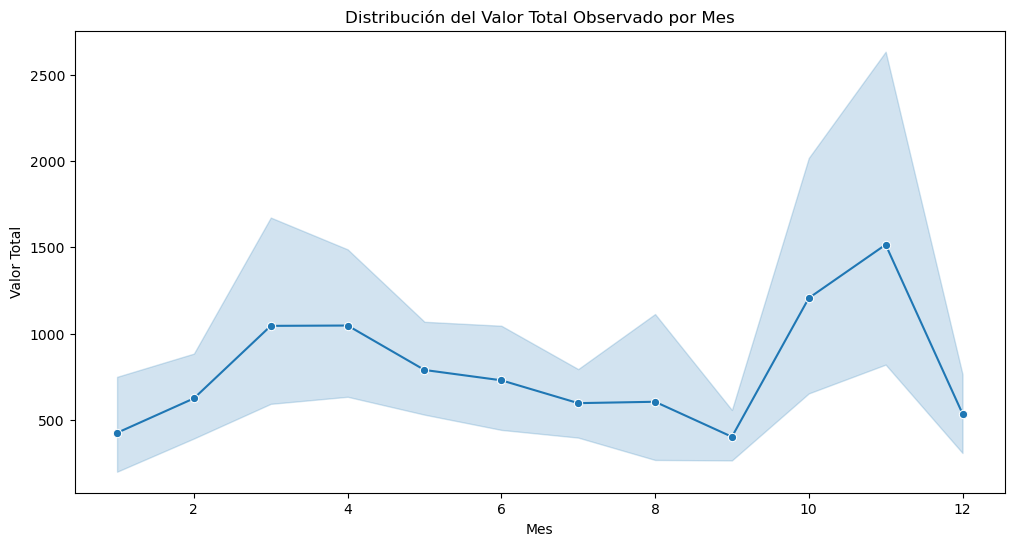

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Total', data=df_grouped, marker='o')
plt.title('Distribución del Valor Total Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Total')
plt.show()

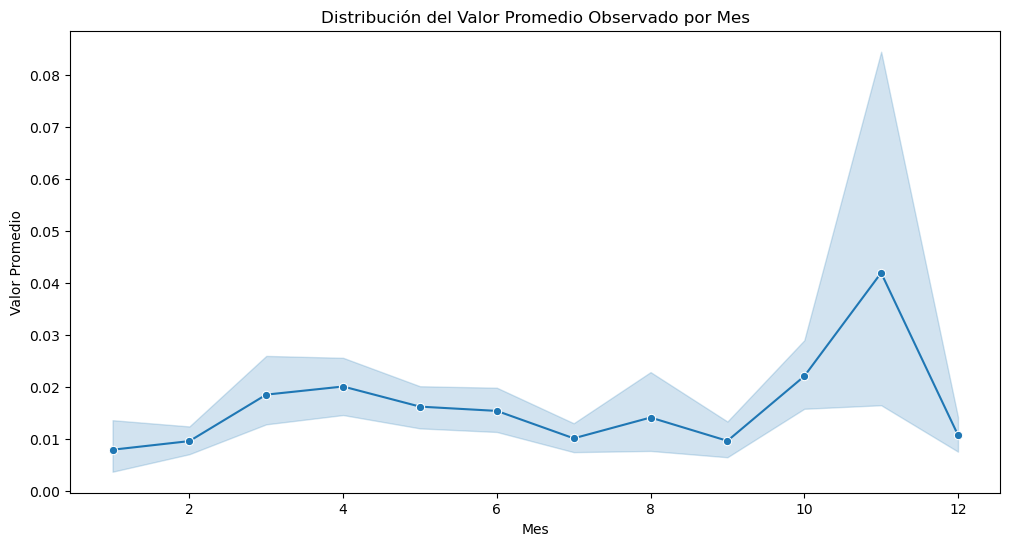

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y='Valor Promedio', data=df_grouped, marker='o')
plt.title('Distribución del Valor Promedio Observado por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio')
plt.show()

C:\Users\danie\AppData\Local\Temp\ipykernel_1188\1935551366.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




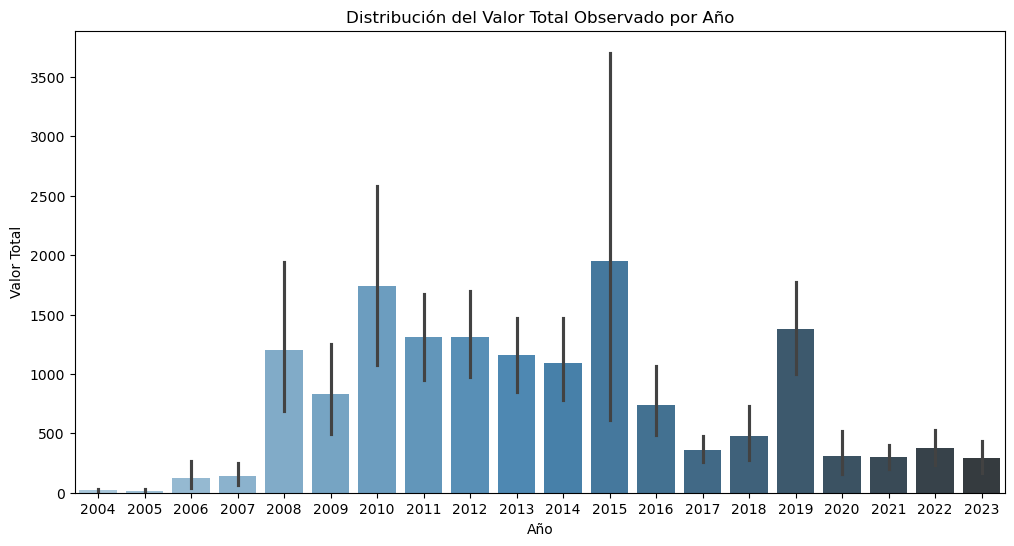

In [25]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Total', data=df_grouped, palette='Blues_d')
plt.title('Distribución del Valor Total Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Total')
plt.show()

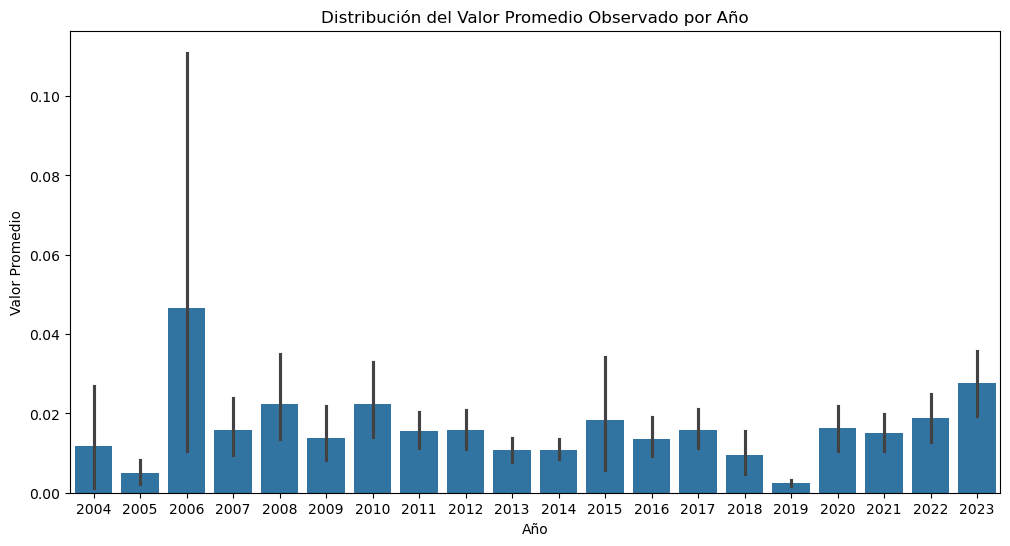

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Year', y='Valor Promedio', data=df_grouped)
plt.title('Distribución del Valor Promedio Observado por Año')
plt.xlabel('Año')
plt.ylabel('Valor Promedio')
plt.show()

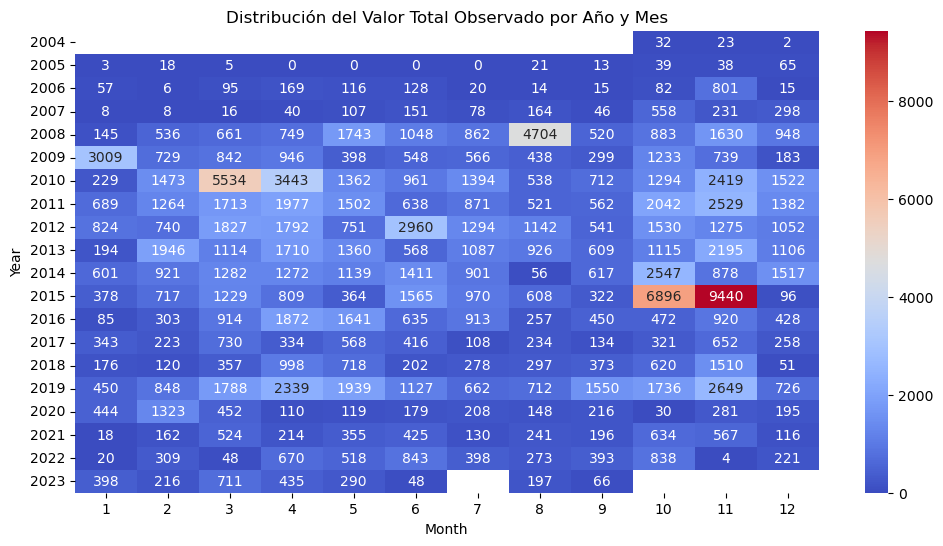

In [27]:
df_pivot = df_grouped.pivot(index='Year', columns='Month', values='Valor Total')

# Heatmap para visualizar el valor total observado por año y mes
plt.figure(figsize=(12, 6))
sns.heatmap(df_pivot, cmap='coolwarm',annot=True,fmt='.0f')
plt.title('Distribución del Valor Total Observado por Año y Mes')
plt.show()

In [28]:
df_grouped = df_bogota.groupby(['Year', 'Month','Latitud','Longitud'])['ValorObservado'].agg(['sum', 'mean']).reset_index()

df_grouped.columns = ['Year', 'Month','Latitud','Longitud', 'Valor Total', 'Valor Promedio']

df_grouped

C:\Users\danie\AppData\Local\Temp\ipykernel_1188\1044252746.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



,Year,Month,Latitud,Longitud,Valor Total,Valor Promedio
0,2004,1,4.343,-74.017,0.0,NaN
1,2004,1,4.343,-74.019,0.0,NaN
2,2004,1,4.343,-74.022,0.0,NaN
3,2004,1,4.343,-74.031,0.0,NaN
4,2004,1,4.343,-74.05,0.0,NaN
...,...,...,...,...,...,...
293995,2023,12,4.138,-74.184,0.0,NaN
293996,2023,12,4.138,-74.205,0.0,NaN
293997,2023,12,4.138,-74.233,0.0,NaN
293998,2023,12,4.138,-74.317,0.0,NaN


<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\danie\Documents\Anaconda\envs\EnvBootcamp\Lib\site-packages\IPython\core\events.py:82: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

c:\Users\danie\Documents\Anaconda\envs\EnvBootcamp\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



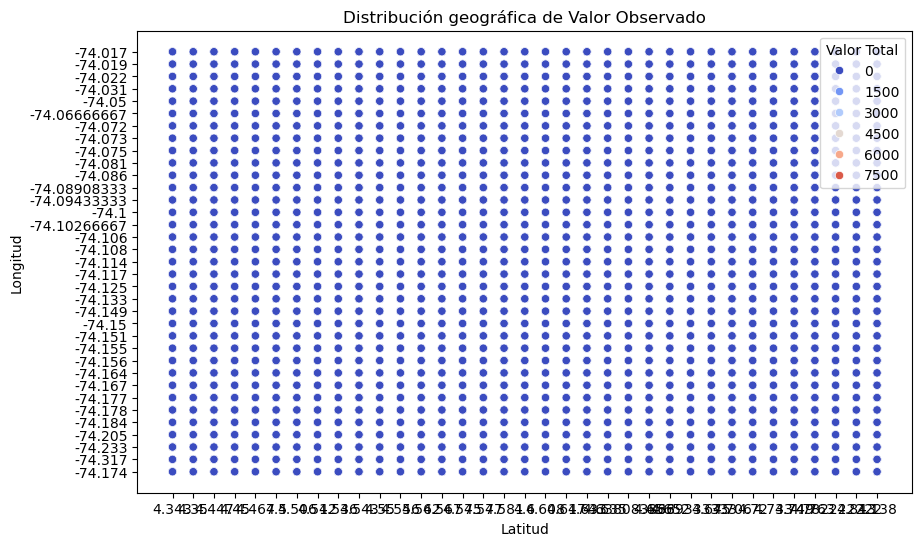

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Latitud', y='Longitud', hue='Valor Total', data=df_grouped, palette='coolwarm')
plt.title('Distribución geográfica de Valor Observado')
plt.show

### 23 últimos


Cantidad de estaciones

In [9]:
X = Rain.loc[Rain['Sta']==0, 'Date'].values
Y = Rain.loc[Rain['Sta']==0, 'Rain'].values


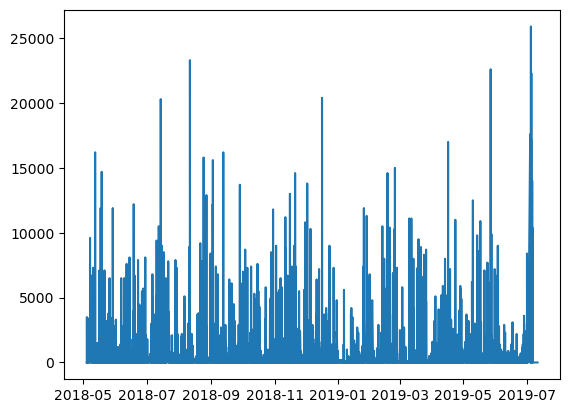

In [11]:
plt.plot(X,Y)
plt.show()